# three_layer_neuron_network.py
> The code below is copied from my three_layer_neuron_network.py file for reference. This address 1a, 1b, 1c, and 1d.2. The handwritten derivations of the backprop equations are attached as a PDF to the bottom of this report.

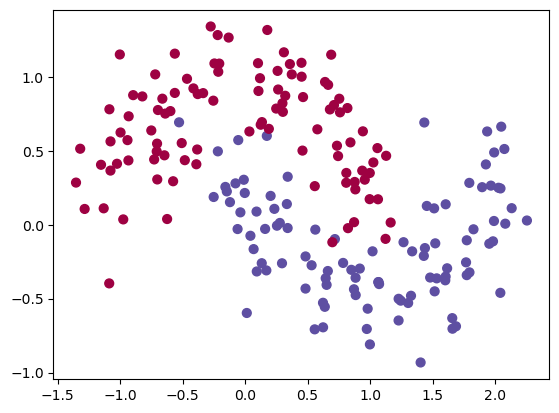

Loss after iteration 0: 0.002382
Loss after iteration 1000: 0.003487
Loss after iteration 2000: 0.003772
Loss after iteration 3000: 0.003871
Loss after iteration 4000: 0.003916
Loss after iteration 5000: 0.003941
Loss after iteration 6000: 0.003954
Loss after iteration 7000: 0.003962
Loss after iteration 8000: 0.003967
Loss after iteration 9000: 0.003969
Loss after iteration 10000: 0.003971
Loss after iteration 11000: 0.003972
Loss after iteration 12000: 0.003972
Loss after iteration 13000: 0.003972
Loss after iteration 14000: 0.003972
Loss after iteration 15000: 0.003972
Loss after iteration 16000: 0.003972
Loss after iteration 17000: 0.003972
Loss after iteration 18000: 0.003972
Loss after iteration 19000: 0.003972


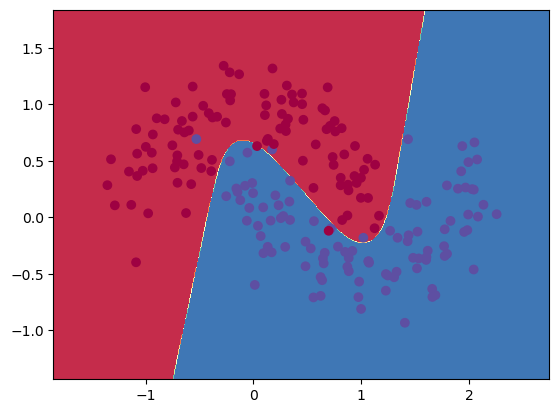

In [13]:
__author__ = 'kai_malcolm'
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder


def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: tanh, sigmoid, or relu
        :return: activations
        '''

        # YOU IMPLMENT YOUR actFun HERE
        if type.lower()=='tanh':
            z_out = np.tanh(z)
        elif type.lower()=='sigmoid':
            z_out = 1 / (1 + np.exp(-z))
        elif type.lower()=='relu':
            z_out = np.maximum(0, z)
        elif type.lower() == 'softmax': # Add softmax since this is what we are doing when we set self.probs
            exp_scores = np.exp(z)
            return exp_scores / exp_scores.sum(axis=1, keepdims=True)
        else:
            raise ValueError('That activation function type is not defined.')

        return z_out

    def diff_actFun(self, z, type):
        '''
        diff_actFun computes the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        if type.lower()=='tanh':
            z_out_prime = 1 - np.power(np.tanh(z), 2)
        elif type.lower()=='sigmoid':
            z_out_prime = self.actFun(z, type)*(1 - self.actFun(z, type))
        elif type.lower()=='relu':
            z_out_prime = (z > 0).astype('float')
        elif type.lower() == 'softmax':
            return z
        else:
            raise ValueError('That activation function type is not defined.')

        return z_out_prime

    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE
        self.z1 = X@self.W1 + self.b1
        self.a1 = actFun(self.z1)
        self.z2 = self.a1@self.W2 + self.b2
        # No a2? Ig implicitly the below is analogous to softmax?
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return None

    def calculate_loss(self, X, y):
        '''
        calculate_loss computes the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        y_onehot = OneHotEncoder(sparse_output=False).fit_transform(y.reshape((-1, 1)))
        data_loss = (-1/num_examples) * np.sum(np.log(self.probs) * y_onehot)

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs
        delta3[range(num_examples), y] -= 1

        # dW2 = dL/dW2
        dW2 = self.a1.T @ delta3
        # db2 = dL/db2
        db2 = np.sum(delta3, axis=0, keepdims=True)
        # Need to find delta2 for earlier layer
        delta2 = (delta3 @ self.W2.T) * self.diff_actFun(self.z1, type=self.actFun_type)
        # dW1 = dL/dW1
        dW1 = X.T @ delta2
        # db1 = dL/db1
        db1 = np.sum(delta2, axis=0) #, keepdims=False

        return dW1, dW2, db1, db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add regularization terms
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)

def main():
    # # generate and visualize Make-Moons dataset
    X, y = generate_data()
    #####################################################
    ### INCLUDE THIS FIGURE IN THE REPORT ###
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    # tanh, sigmoid, relu
    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='tanh')
    model.fit_model(X,y)
    model.visualize_decision_boundary(X,y)

if __name__ == "__main__":
    main()

Train the network using different activation functions (Tanh, Sigmoid and ReLU). Describe and explain the differences that you observe. Include the figures generated in your report.

## 2e.1 and 2e.2
tanh

Loss after iteration 0: 0.002382
Loss after iteration 1000: 0.003487
Loss after iteration 2000: 0.003772
Loss after iteration 3000: 0.003871
Loss after iteration 4000: 0.003916
Loss after iteration 5000: 0.003941
Loss after iteration 6000: 0.003954
Loss after iteration 7000: 0.003962
Loss after iteration 8000: 0.003967
Loss after iteration 9000: 0.003969
Loss after iteration 10000: 0.003971
Loss after iteration 11000: 0.003972
Loss after iteration 12000: 0.003972
Loss after iteration 13000: 0.003972
Loss after iteration 14000: 0.003972
Loss after iteration 15000: 0.003972
Loss after iteration 16000: 0.003972
Loss after iteration 17000: 0.003972
Loss after iteration 18000: 0.003972
Loss after iteration 19000: 0.003972


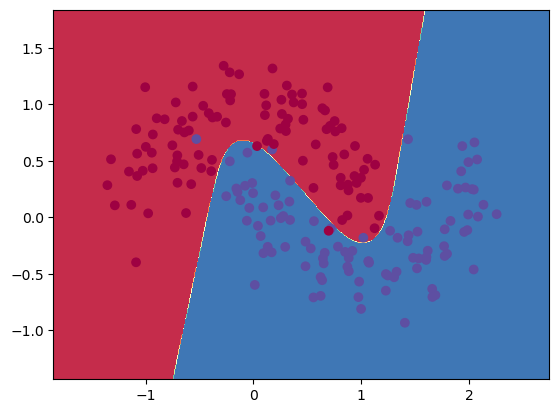

In [16]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

sigmoid

Loss after iteration 0: 0.003348
Loss after iteration 1000: 0.008907
Loss after iteration 2000: 0.010852
Loss after iteration 3000: 0.011388
Loss after iteration 4000: 0.011649
Loss after iteration 5000: 0.011794
Loss after iteration 6000: 0.011876
Loss after iteration 7000: 0.011923
Loss after iteration 8000: 0.011950
Loss after iteration 9000: 0.011966
Loss after iteration 10000: 0.011975
Loss after iteration 11000: 0.011979
Loss after iteration 12000: 0.011982
Loss after iteration 13000: 0.011983
Loss after iteration 14000: 0.011984
Loss after iteration 15000: 0.011984
Loss after iteration 16000: 0.011984
Loss after iteration 17000: 0.011984
Loss after iteration 18000: 0.011984
Loss after iteration 19000: 0.011983


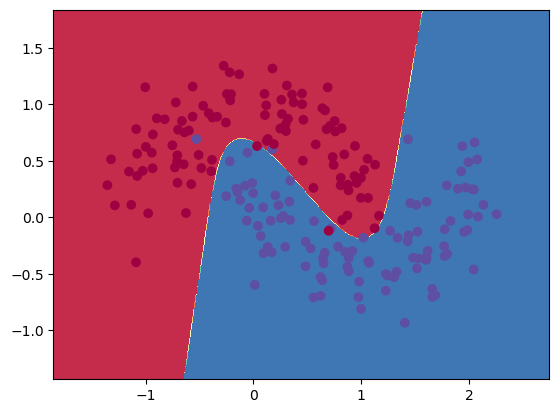

In [17]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='sigmoid')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

relu

Loss after iteration 0: 0.003022
Loss after iteration 1000: 0.003473
Loss after iteration 2000: 0.003937
Loss after iteration 3000: 0.004095
Loss after iteration 4000: 0.004160
Loss after iteration 5000: 0.004176
Loss after iteration 6000: 0.004179
Loss after iteration 7000: 0.004177
Loss after iteration 8000: 0.004175
Loss after iteration 9000: 0.004172
Loss after iteration 10000: 0.004171
Loss after iteration 11000: 0.004170
Loss after iteration 12000: 0.004169
Loss after iteration 13000: 0.004168
Loss after iteration 14000: 0.004169
Loss after iteration 15000: 0.004167
Loss after iteration 16000: 0.004169
Loss after iteration 17000: 0.004167
Loss after iteration 18000: 0.004169
Loss after iteration 19000: 0.004169


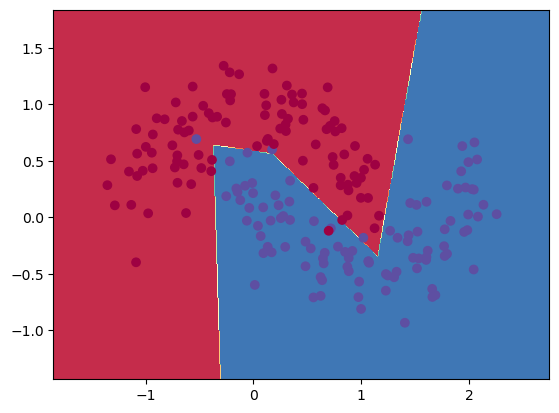

In [18]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='relu')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

> __Conclusions:__ It is clear that the different activation functions make a big difference in the output. In this case, the decision boundaries between sigmoid and tanh are very similar, which is somewhat expected as they are both pretty smooth functions. Since the gradient didn't vanish (problem with sigmoid functions), we would expect and do see that the results are good for both sigmoid and tanh. With relu we can see the largest change, as the smoothness is gone, repalced by a couple of straight line segments (perhaps related to the number of layers used, which dictates the number of indepdent line segments the netwrok can learn). Relu of course is flat at 0 and then simple a straight line so it is not entirely suprising that using relu results in a straight lined decision boundary.

Increase the number of hidden units (nn hidden dim) and retrain the network using Tanh as the activation function. Describe and explain the differences that you observe. Include the figures generated in your report.


Loss after iteration 0: 0.003540
Loss after iteration 1000: 0.005674
Loss after iteration 2000: 0.008384
Loss after iteration 3000: 0.010099
Loss after iteration 4000: 0.011278
Loss after iteration 5000: 0.012148
Loss after iteration 6000: 0.012811
Loss after iteration 7000: 0.013321
Loss after iteration 8000: 0.013714
Loss after iteration 9000: 0.014024
Loss after iteration 10000: 0.014253
Loss after iteration 11000: 0.014416
Loss after iteration 12000: 0.014535
Loss after iteration 13000: 0.014623
Loss after iteration 14000: 0.014689
Loss after iteration 15000: 0.014739
Loss after iteration 16000: 0.014778
Loss after iteration 17000: 0.014808
Loss after iteration 18000: 0.014832
Loss after iteration 19000: 0.014852


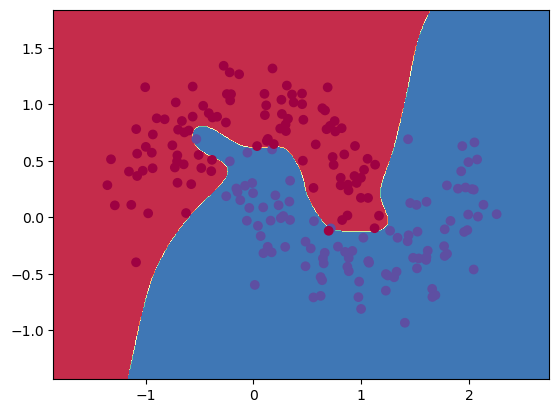

In [19]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=10 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.019849
Loss after iteration 1000: 0.006528
Loss after iteration 2000: 0.008100
Loss after iteration 3000: 0.009188
Loss after iteration 4000: 0.010293
Loss after iteration 5000: 0.011479
Loss after iteration 6000: 0.012538
Loss after iteration 7000: 0.013383
Loss after iteration 8000: 0.014027
Loss after iteration 9000: 0.014508
Loss after iteration 10000: 0.014865
Loss after iteration 11000: 0.015127
Loss after iteration 12000: 0.015317
Loss after iteration 13000: 0.015449
Loss after iteration 14000: 0.015531
Loss after iteration 15000: 0.015568
Loss after iteration 16000: 0.015572
Loss after iteration 17000: 0.015552
Loss after iteration 18000: 0.015518
Loss after iteration 19000: 0.015475


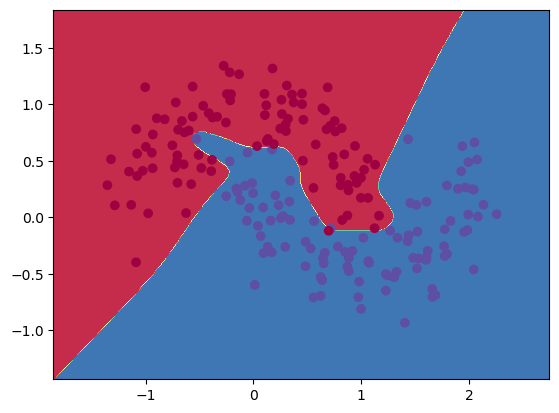

In [20]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=100 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

> __Conclusions:__ For this example at least, while there are minute changes, it is not extremely different even tho the numberof hidden nodes per layer increased by a factor of 10. The decision boundary with more hidden nodes is slightly smoother/more intuitive (perhaps reflecting more degrees of freedom), but the actual classification boudnary is only minutely shifted.

# n_layer_neural_network.py (1f)
- We provide you hints below to help you organize and implement the code, but if you have better ideas, please feel free to implement them and ignore our hints. In your report, please tell us why you made the choice(s) you did.


Loss after iteration 0: 0.005135
Accuracy after iteration 0: 0.660000
Loss after iteration 1000: 0.006228
Accuracy after iteration 1000: 0.985000
Loss after iteration 2000: 0.008554
Accuracy after iteration 2000: 0.995000
Loss after iteration 3000: 0.008240
Accuracy after iteration 3000: 1.000000
Loss after iteration 4000: 0.007517
Accuracy after iteration 4000: 1.000000
Loss after iteration 5000: 0.006950
Accuracy after iteration 5000: 1.000000
Loss after iteration 6000: 0.006539
Accuracy after iteration 6000: 1.000000
Loss after iteration 7000: 0.006242
Accuracy after iteration 7000: 1.000000
Loss after iteration 8000: 0.006020
Accuracy after iteration 8000: 1.000000
Loss after iteration 9000: 0.005845
Accuracy after iteration 9000: 1.000000


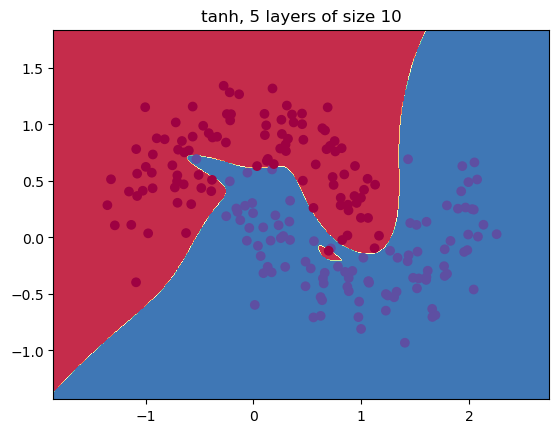

In [21]:
# These are already importaed above
#import three_layer_neural_network as tlnn
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder

class DeepNeuralNetwork(NeuralNetwork):
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, n_layers, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units (layer size)
        :param nn_output_dim: output dimension
        :param n_layers: number of layers
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.n_layers = n_layers
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        
        self.layers = []
        # Passing in "self" (current neural network obj) so I can access activation funcs and such
        # Set the 1st layer as input_dim x hidden_dim
        self.layers.append(Layer(self, nn_input_dim, nn_hidden_dim, actFun_type))
        # Set the middle layers as hidden_dim x hidden_dim
        for _ in range(n_layers - 3):
            self.layers.append(Layer(self, nn_hidden_dim, nn_hidden_dim, actFun_type))
        # Set the last layer as hidden_dim x output_dim
        self.layers.append(Layer(self, nn_hidden_dim, nn_output_dim, 'softmax'))

    def feedforward(self, X):
        # YOU IMPLEMENT YOUR feedforward HERE
        self.activations = []
        # First "activation" is just the input to the network
        activation = X
        for layer in self.layers:
            # Activations of each previous layer are fed into the next
            layer.feedforward(activation) # Sets layer.a, AKA the resulting activation
            activation = layer.a
            self.activations.append(activation)
        # Final activation is the output of softmax and thus the predicted probabilities
        self.probs = activation
        return None

    def calculate_loss(self, X, y):
        num_examples = len(X)
        self.feedforward(X)
        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        y_onehot = OneHotEncoder(sparse_output=False).fit_transform(y.reshape((-1, 1)))
        data_loss = (-1/num_examples) * np.sum(np.log(self.probs) * y_onehot)
        # Add regulatization term to loss (optional)
        data_loss += (self.reg_lambda / 2) * np.sum([np.square(layer.W).sum() for layer in self.layers])
        return (1. / num_examples) * data_loss

    def predict(self, X):
        # This is DNN feedfoward (eg not layer.feedfoward):
        self.feedforward(X) # This sets self.probs
        # argmax is the class with the highest predicted probability
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        # delta3 is the output of the neural network, adjusted for predicting what the correct class is
        delta3 = self.probs.copy()
        delta3[range(num_examples), y] -= 1
        # Use Layer()-wise backprop
        # Derivative of the activation
        da = self.layers[-1].backprop(da=None, a_previous=self.layers[-2].a, dz=delta3)
        # Iterate through [n_layers-3, n_layers-4, ... , 1]
        for i in np.arange(1, self.n_layers-2)[::-1]:
            # Note: layer.backprop DOES return something, but dnn.backprop does NOT
            da = self.layers[i].backprop(da=da, a_previous=self.layers[i-1].a)
        self.layers[0].backprop(da, X)
        return None

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        # Eg run gradient descent for num_passes iters
        for i in range(0, num_passes):
            self.feedforward(X)
            self.backprop(X, y)
            for layer in self.layers:
                layer.gradient_step(epsilon, self.reg_lambda)
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))
                print("Accuracy after iteration %i: %f" % (i, (self.probs.argmax(axis=1) == y).sum() / len(y)))

    def visualize_decision_boundary(self, X, y):
        plot_decision_boundary(lambda x: self.predict(x), X, y)

class Layer(object):
    def __init__(self, neuralnet_obj, nn_input_dim, nn_output_dim, actFun_type='tanh'):
        self.neuralnet_obj = neuralnet_obj # Required in order to access self.activationfuncs defined in dnn class
        self.nn_input_dim = nn_input_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        # Init weight and biases to random matrix and vector of zeros, respectively
        self.W = (1/np.sqrt(self.nn_input_dim)) * np.random.randn(self.nn_input_dim, self.nn_output_dim) 
        self.b = np.zeros((1, self.nn_output_dim))
        
    # Implement feedforward for a single layer
    def feedforward(self, X):
        self.z = X @ self.W + self.b
        self.a = self.neuralnet_obj.actFun(self.z, self.actFun_type)
        return None
    
    # Implement backprop for a single layer
    def backprop(self, da, a_previous, dz=None):
        # z is the output
        # a is the actual activation
        # W, b are the weights and biases
        if dz is None:
            self.dz = self.neuralnet_obj.diff_actFun(self.z, self.actFun_type) * da
        else:
            self.dz = dz
        self.dW = a_previous.T @ self.dz
        self.db = np.sum(self.dz, axis=0, keepdims=True)
        return self.dz @ self.W.T
                                            
    def gradient_step(self, epsilon, reg_lambda):
        self.dW += reg_lambda * self.W
        self.W -= epsilon * self.dW
        self.b -= epsilon * self.db
        return None

if __name__ == "__main__":
    # generate and visualize Make-Moons dataset
    X, y = generate_data()
    #plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    #plt.show()

    actFun_type = 'tanh' #sigmoid, relu
    hidden_neurons_per_layer = 10
    num_layers = 5

    deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
    deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
    plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
    deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Train your network on the Make Moons dataset using different number of layers, different layer sizes, different activation functions and, in general, different network configurations. In your report, include generated images and describe what you observe and what you find interesting (e.g. decision boundary of deep vs shallow neural networks).


different number of layers

Loss after iteration 0: 0.005149
Accuracy after iteration 0: 0.685000
Loss after iteration 1000: 0.045324
Accuracy after iteration 1000: 0.500000
Loss after iteration 2000: 0.067127
Accuracy after iteration 2000: 0.500000
Loss after iteration 3000: 0.063224
Accuracy after iteration 3000: 0.500000
Loss after iteration 4000: 0.055940
Accuracy after iteration 4000: 0.500000
Loss after iteration 5000: 0.051606
Accuracy after iteration 5000: 0.500000
Loss after iteration 6000: 0.047680
Accuracy after iteration 6000: 0.500000
Loss after iteration 7000: 0.041555
Accuracy after iteration 7000: 0.500000
Loss after iteration 8000: 0.040073
Accuracy after iteration 8000: 0.500000
Loss after iteration 9000: 0.042978
Accuracy after iteration 9000: 0.500000


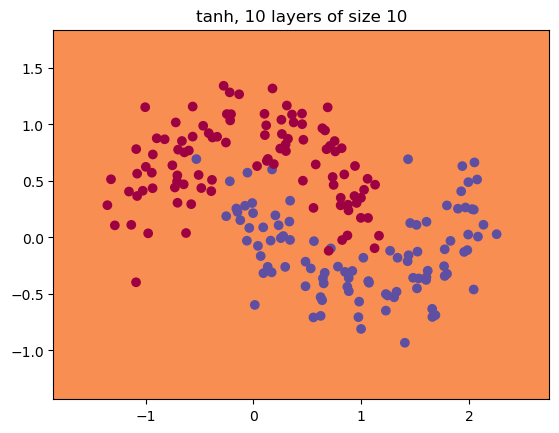

In [22]:
actFun_type = 'tanh' #sigmoid, relu
hidden_neurons_per_layer = 10
num_layers = 10
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.007548
Accuracy after iteration 0: 0.620000
Loss after iteration 1000: 0.646200
Accuracy after iteration 1000: 0.500000
Loss after iteration 2000: 0.538679
Accuracy after iteration 2000: 0.500000
Loss after iteration 3000: 0.444774
Accuracy after iteration 3000: 0.500000
Loss after iteration 4000: 0.370777
Accuracy after iteration 4000: 0.500000
Loss after iteration 5000: 0.305076
Accuracy after iteration 5000: 0.500000
Loss after iteration 6000: 1.018711
Accuracy after iteration 6000: 0.500000
Loss after iteration 7000: 0.839414
Accuracy after iteration 7000: 0.500000
Loss after iteration 8000: 0.693032
Accuracy after iteration 8000: 0.500000
Loss after iteration 9000: 0.572110
Accuracy after iteration 9000: 0.500000


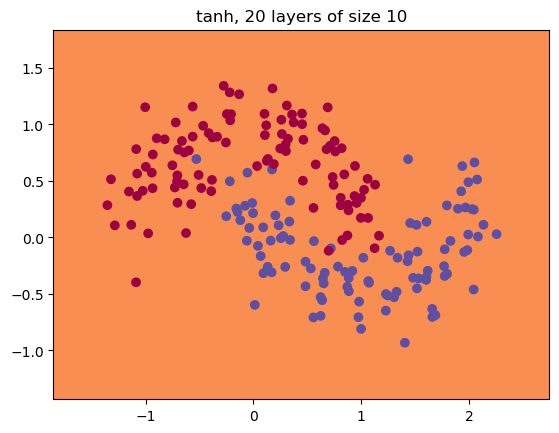

In [23]:
actFun_type = 'tanh' #sigmoid, relu
hidden_neurons_per_layer = 10
num_layers = 20
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

different layer sizes

Loss after iteration 0: 0.003233
Accuracy after iteration 0: 0.715000
Loss after iteration 1000: 0.004911
Accuracy after iteration 1000: 0.985000
Loss after iteration 2000: 0.007722
Accuracy after iteration 2000: 0.965000
Loss after iteration 3000: 0.007991
Accuracy after iteration 3000: 0.995000
Loss after iteration 4000: 0.008734
Accuracy after iteration 4000: 0.995000
Loss after iteration 5000: 0.009527
Accuracy after iteration 5000: 0.990000
Loss after iteration 6000: 0.009839
Accuracy after iteration 6000: 1.000000
Loss after iteration 7000: 0.009158
Accuracy after iteration 7000: 1.000000
Loss after iteration 8000: 0.008398
Accuracy after iteration 8000: 1.000000
Loss after iteration 9000: 0.007773
Accuracy after iteration 9000: 1.000000


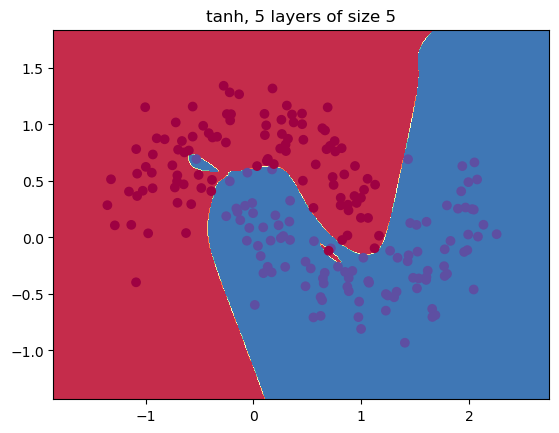

In [24]:
actFun_type = 'tanh' #sigmoid, relu
hidden_neurons_per_layer = 5
num_layers = 5
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.007667
Accuracy after iteration 0: 0.815000
Loss after iteration 1000: 0.019617
Accuracy after iteration 1000: 0.995000
Loss after iteration 2000: 0.019223
Accuracy after iteration 2000: 1.000000
Loss after iteration 3000: 0.016543
Accuracy after iteration 3000: 1.000000
Loss after iteration 4000: 0.014318
Accuracy after iteration 4000: 1.000000
Loss after iteration 5000: 0.012581
Accuracy after iteration 5000: 1.000000
Loss after iteration 6000: 0.011243
Accuracy after iteration 6000: 1.000000
Loss after iteration 7000: 0.010202
Accuracy after iteration 7000: 1.000000
Loss after iteration 8000: 0.014855
Accuracy after iteration 8000: 1.000000
Loss after iteration 9000: 0.012911
Accuracy after iteration 9000: 1.000000


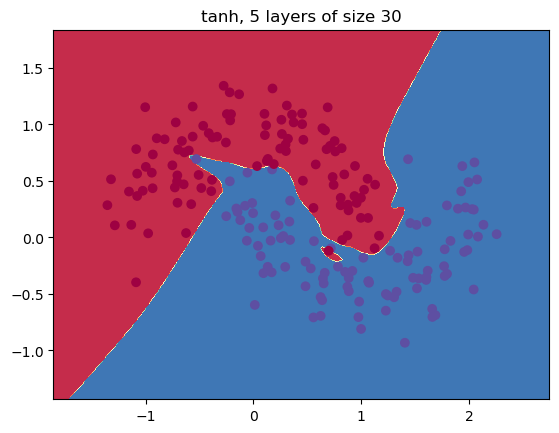

In [25]:
actFun_type = 'tanh' #sigmoid, relu
hidden_neurons_per_layer = 30
num_layers = 5
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

> __Conclusion:__ It is clear that when using many model layers, for this task at least, the network cannot converge (represented by the orange background indicating poor performance as it is not sure what to classify). Note that in this example, we keep the number of hidden nodes per layer fixed, and thus we could probably get it to converge by playing with other hyperparams, but here I am only interersted in showing how the number of layers affects the decision boundary. Clearly, this dataset is best suited for just a few model layer (<10).

different activation functions

Loss after iteration 0: 0.005185
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.008804
Accuracy after iteration 1000: 0.975000
Loss after iteration 2000: 0.009281
Accuracy after iteration 2000: 0.970000
Loss after iteration 3000: 0.010059
Accuracy after iteration 3000: 0.980000
Loss after iteration 4000: 0.010908
Accuracy after iteration 4000: 0.980000
Loss after iteration 5000: 0.011717
Accuracy after iteration 5000: 0.980000
Loss after iteration 6000: 0.012637
Accuracy after iteration 6000: 0.980000
Loss after iteration 7000: 0.013581
Accuracy after iteration 7000: 0.980000
Loss after iteration 8000: 0.014298
Accuracy after iteration 8000: 0.980000
Loss after iteration 9000: 0.014845
Accuracy after iteration 9000: 0.980000


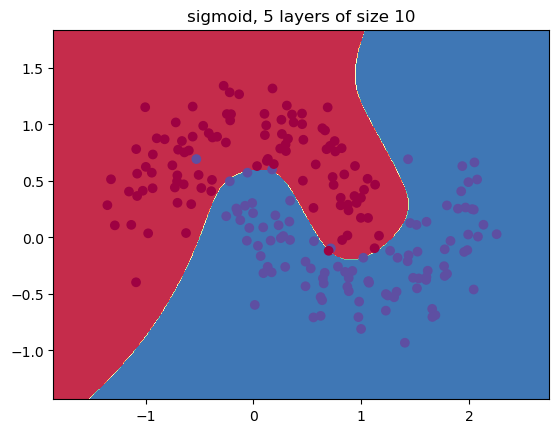

In [26]:
actFun_type = 'sigmoid'
hidden_neurons_per_layer = 10
num_layers = 5
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.006156
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.004717
Accuracy after iteration 1000: 0.975000
Loss after iteration 2000: 0.005028
Accuracy after iteration 2000: 0.975000
Loss after iteration 3000: 0.005149
Accuracy after iteration 3000: 0.975000
Loss after iteration 4000: 0.005364
Accuracy after iteration 4000: 0.970000
Loss after iteration 5000: 0.005527
Accuracy after iteration 5000: 0.965000
Loss after iteration 6000: 0.006991
Accuracy after iteration 6000: 0.810000
Loss after iteration 7000: 0.006739
Accuracy after iteration 7000: 0.810000
Loss after iteration 8000: 0.006466
Accuracy after iteration 8000: 0.810000
Loss after iteration 9000: 0.006028
Accuracy after iteration 9000: 0.810000


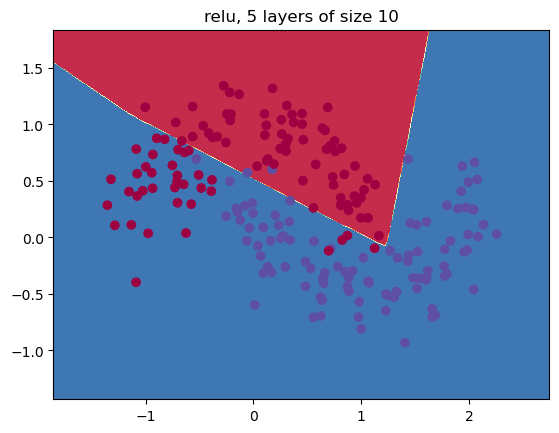

In [27]:
actFun_type = 'relu'
hidden_neurons_per_layer = 10
num_layers = 5
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

> __Conclusion:__ Again, like we observed in the 3 layer case, relu makes the decision bounary straight lines whereas tanh and sigmoid are able to draw smoother curves. In this case, for this fixed network size, the smoother curves do a much better job (98% vs 81% accuracy).

different network configurations
- E.g. all of the above changes combined

Loss after iteration 0: 0.006463
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.005959
Accuracy after iteration 1000: 0.500000
Loss after iteration 2000: 0.005507
Accuracy after iteration 2000: 0.500000
Loss after iteration 3000: 0.005137
Accuracy after iteration 3000: 0.500000
Loss after iteration 4000: 0.004834
Accuracy after iteration 4000: 0.500000
Loss after iteration 5000: 0.004596
Accuracy after iteration 5000: 0.500000
Loss after iteration 6000: 0.004391
Accuracy after iteration 6000: 0.500000
Loss after iteration 7000: 0.004230
Accuracy after iteration 7000: 0.500000
Loss after iteration 8000: 0.004099
Accuracy after iteration 8000: 0.500000
Loss after iteration 9000: 0.003990
Accuracy after iteration 9000: 0.500000


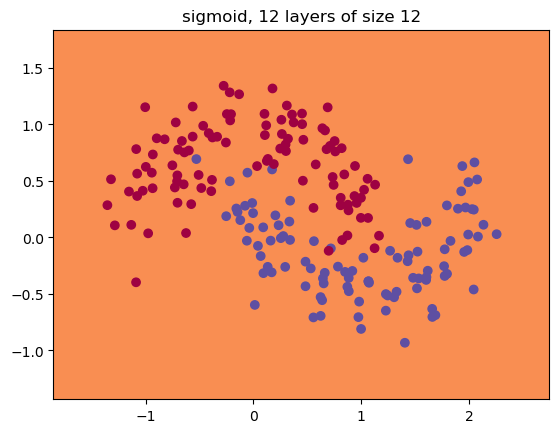

In [28]:
actFun_type = 'sigmoid'
hidden_neurons_per_layer = 12
num_layers = 12
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.015495
Accuracy after iteration 0: 0.770000
Loss after iteration 1000: 0.006105
Accuracy after iteration 1000: 0.975000
Loss after iteration 2000: 0.007352
Accuracy after iteration 2000: 0.980000
Loss after iteration 3000: 0.008167
Accuracy after iteration 3000: 0.980000
Loss after iteration 4000: 0.008811
Accuracy after iteration 4000: 0.985000
Loss after iteration 5000: 0.009606
Accuracy after iteration 5000: 0.985000
Loss after iteration 6000: 0.010426
Accuracy after iteration 6000: 0.985000
Loss after iteration 7000: 0.011133
Accuracy after iteration 7000: 0.990000
Loss after iteration 8000: 0.011723
Accuracy after iteration 8000: 0.990000
Loss after iteration 9000: 0.012194
Accuracy after iteration 9000: 0.990000


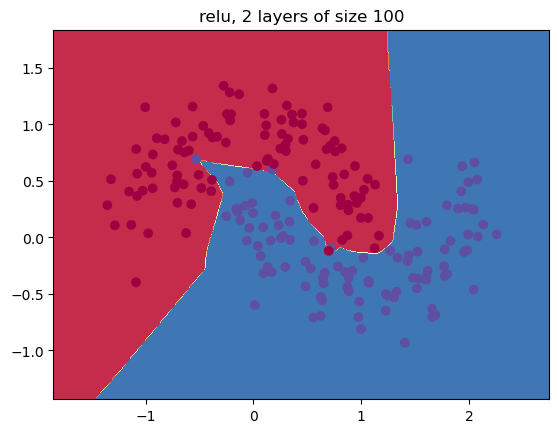

In [29]:
actFun_type = 'relu'
hidden_neurons_per_layer = 100
num_layers = 2
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.003984
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.008013
Accuracy after iteration 1000: 0.975000
Loss after iteration 2000: 0.008817
Accuracy after iteration 2000: 0.980000
Loss after iteration 3000: 0.009652
Accuracy after iteration 3000: 0.975000
Loss after iteration 4000: 0.011163
Accuracy after iteration 4000: 0.975000
Loss after iteration 5000: 0.012820
Accuracy after iteration 5000: 0.980000
Loss after iteration 6000: 0.014000
Accuracy after iteration 6000: 0.980000
Loss after iteration 7000: 0.014797
Accuracy after iteration 7000: 0.980000
Loss after iteration 8000: 0.015345
Accuracy after iteration 8000: 0.980000
Loss after iteration 9000: 0.015731
Accuracy after iteration 9000: 0.980000


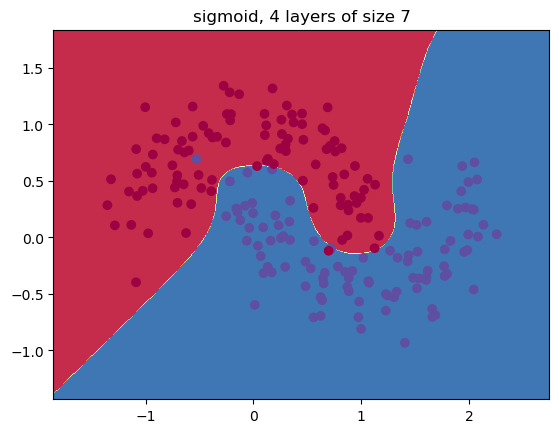

In [30]:
actFun_type = 'sigmoid'
hidden_neurons_per_layer = 7
num_layers = 4
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.005735
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.005324
Accuracy after iteration 1000: 0.500000
Loss after iteration 2000: 0.004987
Accuracy after iteration 2000: 0.500000
Loss after iteration 3000: 0.004711
Accuracy after iteration 3000: 0.500000
Loss after iteration 4000: 0.004485
Accuracy after iteration 4000: 0.500000
Loss after iteration 5000: 0.004301
Accuracy after iteration 5000: 0.500000
Loss after iteration 6000: 0.004149
Accuracy after iteration 6000: 0.500000
Loss after iteration 7000: 0.004025
Accuracy after iteration 7000: 0.500000
Loss after iteration 8000: 0.003924
Accuracy after iteration 8000: 0.500000
Loss after iteration 9000: 0.003841
Accuracy after iteration 9000: 0.500000


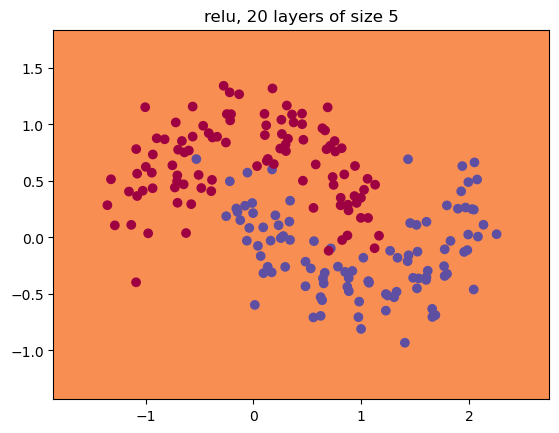

In [31]:
actFun_type = 'relu'
hidden_neurons_per_layer = 5
num_layers = 20
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

> __Conclusion:__ Again note that when we use a small number of model layers, we are able to get the network to converge, but once we start using more than 10 or so layers, the network breaks no matter how many hidden nodes we have. Also note that above 100 hidden nodes (I didn't test to find the exact point) I start getting overflow errors which are not shown. From this analysis, it is clear that using few layers is best, and that using more hidden node (give that you do not have many layers) will impove performance until it starts to overflow. Tanh appears to be better than relu since it is smooth, and sigmoid was found to frequently not converge, presumably due to gradient vanishing.
- It is notable that the decision boundaries, while not perfect, are typically much better and appear to have much more expressive power than their 3 layer predecessor. That said, the 3 layer neural network is close to optimal (my findings show that ~4-5 layers with ~7 hidden nodes best fit this task).

Next, train your network on another dataset different from Make Moons. You can choose datasets provided by Scikit-learn (more details here) or any dataset of your interest. Make sure that you have the correct number of input and output nodes. Again, play with different network configurations. In your report, describe the dataset you choose and tell us what you find interesting.

Plotting code adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
> I chose this dataset since it is pretty canonical in showing how different clustering algorithms (unsupervised ML) works, so I wanted to see if deep learning approaches also fall prey to different pitfalls like many clustering algorithms do (eg many clustering algos work for some but not others of these datasets due to how they are initlaizationed or how they determine their clusters). I expect deep learning to do better.

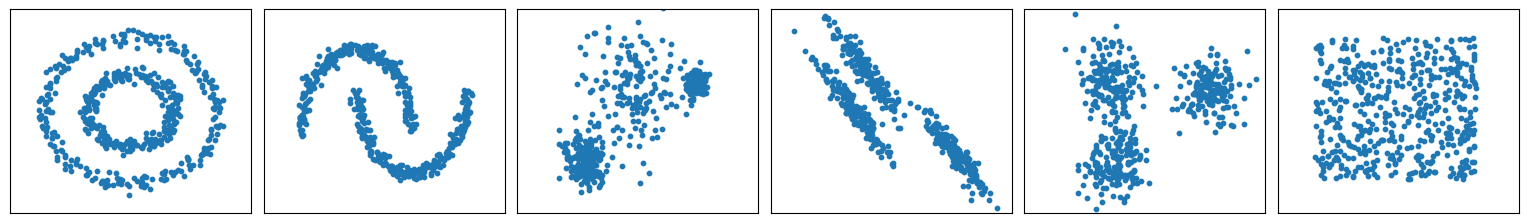

In [58]:
from itertools import cycle, islice
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 2,
    "n_clusters": 2,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    plt.subplot(len(datasets), 8, plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1
plt.show()

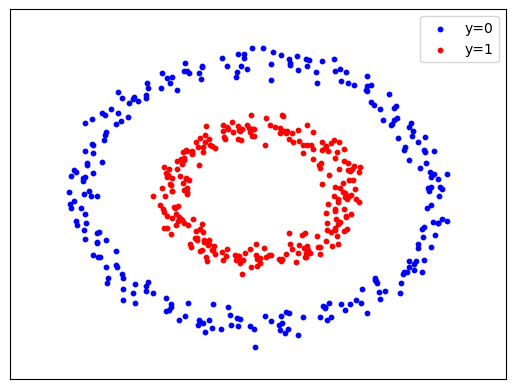

Loss after iteration 0: 0.003195
Accuracy after iteration 0: 0.512000
Loss after iteration 1000: 0.002003
Accuracy after iteration 1000: 1.000000
Loss after iteration 2000: 0.002050
Accuracy after iteration 2000: 1.000000
Loss after iteration 3000: 0.002040
Accuracy after iteration 3000: 1.000000
Loss after iteration 4000: 0.002010
Accuracy after iteration 4000: 1.000000
Loss after iteration 5000: 0.001973
Accuracy after iteration 5000: 1.000000
Loss after iteration 6000: 0.001931
Accuracy after iteration 6000: 1.000000
Loss after iteration 7000: 0.001887
Accuracy after iteration 7000: 1.000000
Loss after iteration 8000: 0.001844
Accuracy after iteration 8000: 1.000000
Loss after iteration 9000: 0.001811
Accuracy after iteration 9000: 1.000000


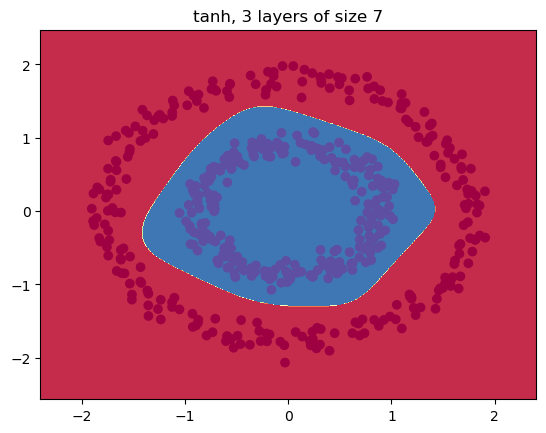

In [71]:
idx = 0
dataset = datasets[idx][0]
X, y = dataset
X = StandardScaler().fit_transform(X)

# Separate data points based on the y values
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, c='blue', label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, c='red', label='y=1')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

actFun_type = 'tanh'
hidden_neurons_per_layer = 7
num_layers = 3
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

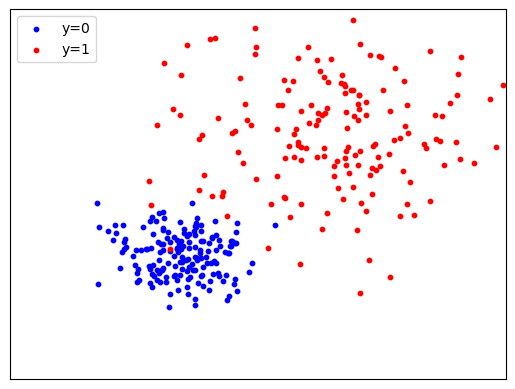

Loss after iteration 0: 0.001235
Accuracy after iteration 0: 0.949102
Loss after iteration 1000: 0.001041
Accuracy after iteration 1000: 0.982036
Loss after iteration 2000: 0.001990
Accuracy after iteration 2000: 0.991018
Loss after iteration 3000: 0.002907
Accuracy after iteration 3000: 0.991018
Loss after iteration 4000: 0.003803
Accuracy after iteration 4000: 0.994012
Loss after iteration 5000: 0.004977
Accuracy after iteration 5000: 0.997006
Loss after iteration 6000: 0.005821
Accuracy after iteration 6000: 0.997006
Loss after iteration 7000: 0.006472
Accuracy after iteration 7000: 0.997006
Loss after iteration 8000: 0.006961
Accuracy after iteration 8000: 0.997006
Loss after iteration 9000: 0.007294
Accuracy after iteration 9000: 0.997006
Loss after iteration 10000: 0.007509
Accuracy after iteration 10000: 0.997006
Loss after iteration 11000: 0.007652
Accuracy after iteration 11000: 0.997006
Loss after iteration 12000: 0.007757
Accuracy after iteration 12000: 0.997006
Loss after i

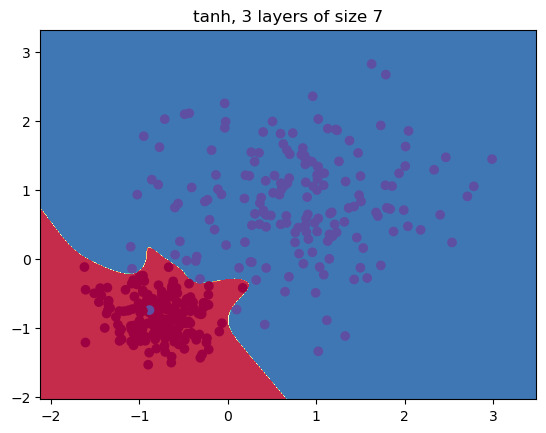

In [68]:
idx = 2
dataset = datasets[idx][0]
X, y = dataset
mask = np.logical_or(y == 0, y == 1)
X_filtered = X[mask]
y = y[mask]
X = StandardScaler().fit_transform(X_filtered)

# Separate data points based on the y values
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, c='blue', label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, c='red', label='y=1')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

actFun_type = 'tanh'
hidden_neurons_per_layer = 7
num_layers = 3
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=20000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

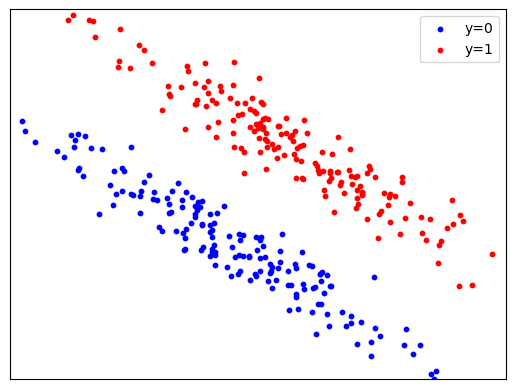

Loss after iteration 0: 0.004001
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.003557
Accuracy after iteration 1000: 0.500000
Loss after iteration 2000: 0.003289
Accuracy after iteration 2000: 0.500000
Loss after iteration 3000: 0.003069
Accuracy after iteration 3000: 0.500000
Loss after iteration 4000: 0.002889
Accuracy after iteration 4000: 0.500000
Loss after iteration 5000: 0.002741
Accuracy after iteration 5000: 0.500000
Loss after iteration 6000: 0.002621
Accuracy after iteration 6000: 0.500000
Loss after iteration 7000: 0.002522
Accuracy after iteration 7000: 0.500000
Loss after iteration 8000: 0.002441
Accuracy after iteration 8000: 0.500000
Loss after iteration 9000: 0.002375
Accuracy after iteration 9000: 0.500000


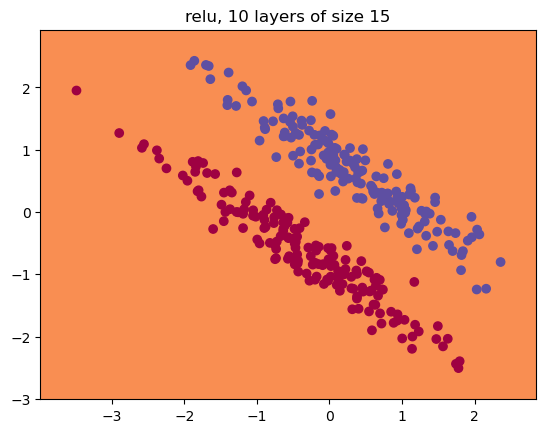

In [74]:
idx = 3
dataset = datasets[idx][0]
X, y = dataset
mask = np.logical_or(y == 0, y == 1)
X_filtered = X[mask]
y = y[mask]
X = StandardScaler().fit_transform(X_filtered)

# Separate data points based on the y values
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, c='blue', label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, c='red', label='y=1')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

actFun_type = 'relu'
hidden_neurons_per_layer = 15
num_layers = 10
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

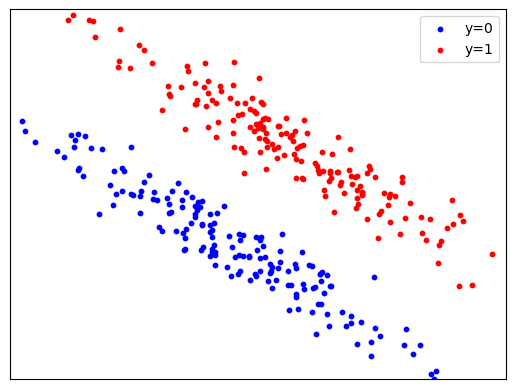

Loss after iteration 0: 0.001388
Accuracy after iteration 0: 0.961078
Loss after iteration 1000: 0.000555
Accuracy after iteration 1000: 1.000000
Loss after iteration 2000: 0.000576
Accuracy after iteration 2000: 1.000000
Loss after iteration 3000: 0.000576
Accuracy after iteration 3000: 1.000000
Loss after iteration 4000: 0.000571
Accuracy after iteration 4000: 1.000000
Loss after iteration 5000: 0.000566
Accuracy after iteration 5000: 1.000000
Loss after iteration 6000: 0.000562
Accuracy after iteration 6000: 1.000000
Loss after iteration 7000: 0.000557
Accuracy after iteration 7000: 1.000000
Loss after iteration 8000: 0.000554
Accuracy after iteration 8000: 1.000000
Loss after iteration 9000: 0.000551
Accuracy after iteration 9000: 1.000000
Loss after iteration 10000: 0.000549
Accuracy after iteration 10000: 1.000000
Loss after iteration 11000: 0.000547
Accuracy after iteration 11000: 1.000000
Loss after iteration 12000: 0.000546
Accuracy after iteration 12000: 1.000000
Loss after i

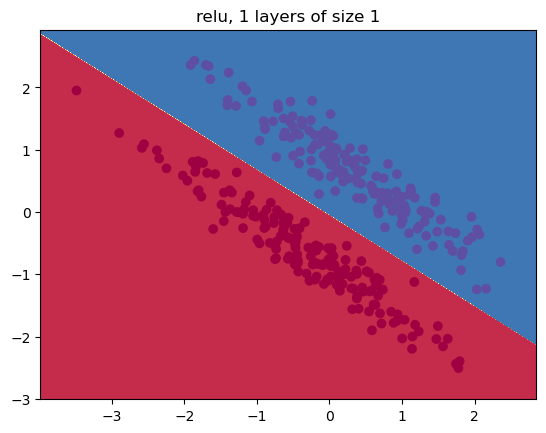

In [72]:
idx = 3
dataset = datasets[idx][0]
X, y = dataset
mask = np.logical_or(y == 0, y == 1)
X_filtered = X[mask]
y = y[mask]
X = StandardScaler().fit_transform(X_filtered)

# Separate data points based on the y values
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, c='blue', label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, c='red', label='y=1')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

actFun_type = 'relu'
hidden_neurons_per_layer = 1
num_layers = 1
deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
deep_model_tanh_5_10.fit_model(X, y, num_passes=20000)
plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
deep_model_tanh_5_10.visualize_decision_boundary(X,y)

> __Conclusions:__ From my experiments, I noticed that tanh was the easiest activation function to fit models with (others frequently resulted in confused models with all orange backgrounds). Additionally, while I initially assumed that higher numbers of layers and hidden units would translate to better performance, especially in simple tasks like these, I found that there is a sweet spot around 3-6 layers with 5-10 hidden units each. When I was trying 15+ for either, I would frequently get overflow errors, or the model simply wouldn't fit. For the final example directly above this, I showed that in the case when the data are linearly separable, we can indeed fit with a single layer ad unit (ie basically the MLP) which is in line with expectations. Shown one above the final graph, using many layers/units for the above task actually result in the model that diverges!

# 2 Training a Simple Deep Convolutional Network on MNIST
## 2a
- Build and Train a 5-layer DCN
- Visualize Training: In your terminal, type tensorboard --logdir=path/to/results where path/to/results is result dir. Follow the instruction in your terminal to visualize the training loss in the training. You will be asked to navigate to a website to see the results, e.g. http://172.28.29.81:6006. Include the figures generated by TensorBoard in your report.


In [ ]:
# -*- coding: utf-8 -*-
"""Assignment_1_Pytorch_MNIST.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1i9KpbQyFU4zfq8zLLns8a2Kd8PRMGsaZ

Overall structure:

1) Set Pytorch metada
- seed
- tensorflow output
- whether to transfer to gpu (cuda)

2) Import data
- download data
- create data loaders with batchsie, transforms, scaling

3) Define Model architecture, loss and optimizer

4) Define Test and Training loop
    - Train:
        a. get next batch
        b. forward pass through model
        c. calculate loss
        d. backward pass from loss (calculates the gradient for each parameter)
        e. optimizer: performs weight updates

5) Perform Training over multiple epochs:
    Each epoch:
    - call train loop
    - call test loop

Acknowledgments:https://github.com/motokimura/pytorch_tensorboard/blob/master/main.py
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.init as init

from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import os
from pathlib import Path

batch_size = 64
test_batch_size = 1000
epochs = 7
lr = 0.01
try_cuda = True # I do not have cuda...
seed = 1000
# Initialize the random seed
logging_interval = 10 # how many batches to wait before logging
exact_folder = r"\RunX"
logging_dir = r"C:\Users\kdmen\Desktop\Fall23\ELEC576\HW1\results" + exact_folder

# 1) setting up the logging
#[inset-code: set up logging]
if logging_dir is None:
    logging_dir = os.path.join('runs', datetime.now().strftime('%b%d_%H-%M-%S'))
else:
    logging_dir = os.path.join(logging_dir, datetime.now().strftime('%b%d_%H-%M-%S'))
writer = SummaryWriter(log_dir=logging_dir)

#deciding whether to send to the cpu or not if available
if torch.cuda.is_available() and try_cuda:
    cuda = True
    torch.cuda.manual_seed(seed)
else:
    cuda = False
    torch.manual_seed(seed)

# Setting up data
given_transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.01307,), (0.3081,))
])

# Both taken from the provided code at: https://github.com/motokimura/pytorch_tensorboard/blob/master/main.py
#train_loader = [inset-code]
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        'data', 
        train=True, 
        download=True,
        transform=given_transform),
    batch_size=batch_size, 
    shuffle=True
)
#test_loader = [inset-code]
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        'data', 
        train=False, 
        download=True,
        transform=given_transform),
    batch_size=test_batch_size, 
    shuffle=True
)

# Defining Architecture, loss, and optimizer
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

        self.use_Xavier = False

        # Initialize the weights using Xavier initialization
        self.initialize_weights()

    def initialize_weights(self):
        if self.use_Xavier:
            for m in self.modules():
                if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                    init.xavier_normal_(m.weight)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x)
        x = F.softmax(x,dim=1) #Dimension out of range (expected to be in range of [-2, 1], but got 10)
        return x

#[inset-code: instantiate model]
# Setup the network 
model = Net()

#optimizer = [inset-code: USE AN ADAM OPTIMIZER]
# Setup optimizer
#optimizer = optim.SGD(model.parameters(), lr=lr) #weight_decay=0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
#optimizer = optim.Adagrad(model.parameters(), lr=lr)
#optimizer = optim.Adadelta(model.parameters(), lr=lr)
#optimizer = optim.RMSprop(model.parameters(), lr=lr)#, weight_decay=0.001, momentum=0.9)

# Defining the test and trainig loops
eps=1e-13

def train(epoch):
    model.train()

    criterion = nn.NLLLoss() 

    for batch_idx, (data, target) in enumerate(train_loader):
        if cuda:
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output = model(data) # forward
        loss = criterion(torch.log(output+eps), target) # = sum_k(-t_k * log(y_k))
        loss.backward()
        optimizer.step()

        if batch_idx % logging_interval == 0:
            #[inset-code: print and log the performance]
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item() ) #loss.data[0]
            )

            # Log train/loss to TensorBoard at every iteration
            n_iter = (epoch - 1) * len(train_loader) + batch_idx + 1
            writer.add_scalar('train/loss', loss.data.item(), n_iter) #loss.data[0]
        if batch_idx % 100 == 0:
            n_iter = (epoch - 1) * len(train_loader) + batch_idx + 1
            # Compute statistics
            for name, param in model.named_parameters():
                #if 'weight' in name:
                writer.add_scalar(f'{name}/std', param.std(), n_iter)
                writer.add_scalar(f'{name}/min', param.min(), n_iter)
                writer.add_scalar(f'{name}/max', param.max(), n_iter)
                # Histogram
                if 'weight' in name:
                    layer, attr = os.path.splitext(name)
                    attr = attr[1:]
                    writer.add_histogram(
                        f'{layer}/{attr}',
                        param.clone().cpu().data.numpy(),
                        n_iter)


def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.NLLLoss(size_average = False)

    for data, target in test_loader:
        if cuda:
            data, target = data.cuda(), target.cuda()

        output = model(data)

        test_loss += criterion(torch.log(output+eps), target,).item() # sum up batch loss (later, averaged over all test samples)
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    #[inset-code: print the performance]
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy)
    )

    # Log test/loss and test/accuracy to TensorBoard at every epoch
    n_iter = epoch * len(train_loader)
    #[inset-code: log the performance]
    writer.add_scalar('test/loss', test_loss, n_iter)
    writer.add_scalar('test/accuracy', test_accuracy, n_iter)

# Training loop

#[inset-code: running test and training over epoch]
# Start training
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)

writer.close()

# Commented out IPython magic to ensure Python compatibility.
"""
#https://stackoverflow.com/questions/55970686/tensorboard-not-found-as-magic-function-in-jupyter

#seems to be working in firefox when not working in Google Chrome when running in Colab
#https://stackoverflow.com/questions/64218755/getting-error-403-in-google-colab-with-tensorboard-with-firefox

# %load_ext tensorboard
# %tensorboard --logdir [dir]

"""

In [94]:
from IPython.display import Image, display
run1_res_path = r'C:\Users\kdmen\Desktop\Fall23\ELEC576\HW1\tensorboard_pngs\Run1'

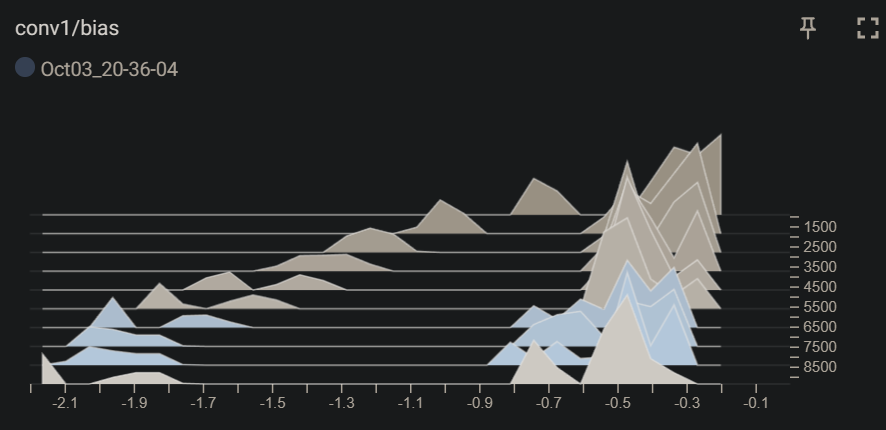

In [95]:
given_image = r'\conv1bias.png'
display(Image(filename=run1_res_path+given_image))

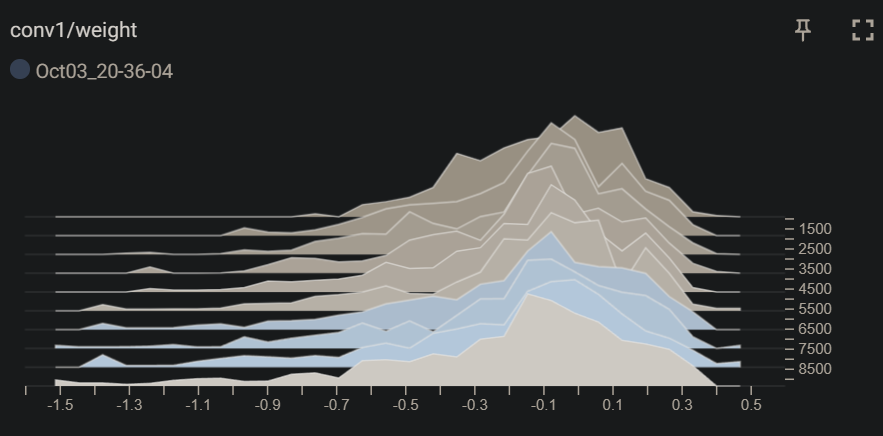

In [96]:
given_image = r'\conv1weight.png'
display(Image(filename=run1_res_path+given_image))

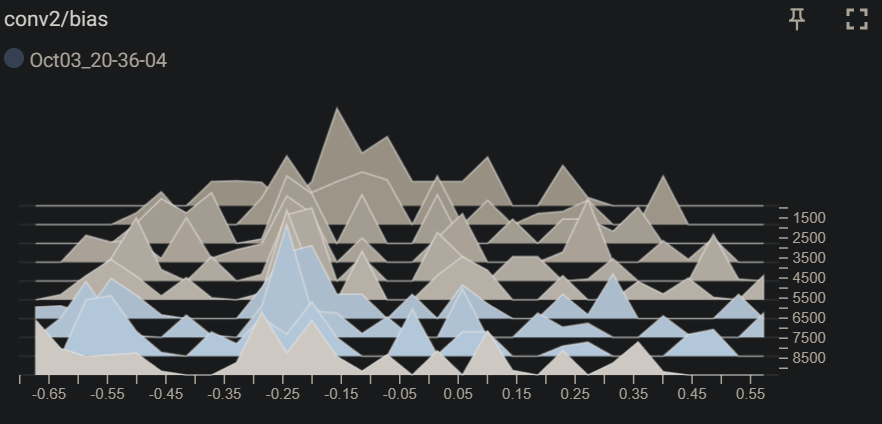

In [97]:
given_image = r'\conv2bias.png'
display(Image(filename=run1_res_path+given_image))

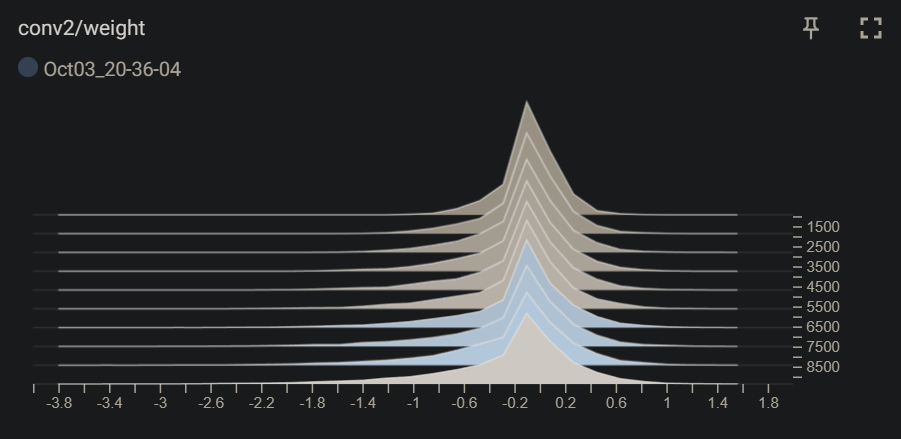

In [98]:
given_image = r'\conv2weight.png'
display(Image(filename=run1_res_path+given_image))

## 2b
- In part (a) of this problem, you only monitor the training loss during the training. Now, let’s visualize your training more! Look at the online documentation or Github examples for PyTorch on how to monitor the statistics (min, max, mean, standard deviation, histogram) of the following terms after each 100 iterations: weights, biases, net inputs at each layer , activations after ReLU at each layer, activations after Max-Pooling at each layer. Also monitor the test and validation error after each 1100 iterations (equivalently, after each epoch). Run the training again and visualize the monitored terms in TensorBoard. Include the resultant figures in your report.
> I followed online documentation at: https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

__I have opted to include most but not all of the images requested, as there are simply way too many and it makes the notebook fail to render__

In [76]:
run2_res_path = r'C:\Users\kdmen\Desktop\Fall23\ELEC576\HW1\tensorboard_pngs\Run2_bmmstd'

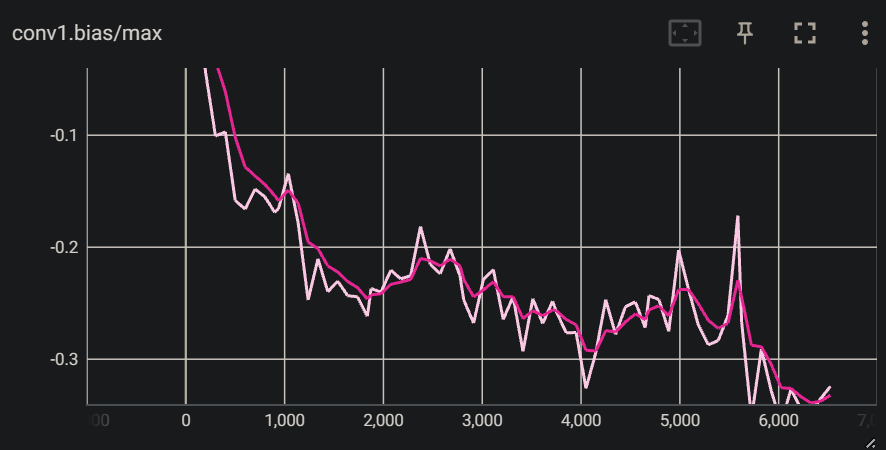

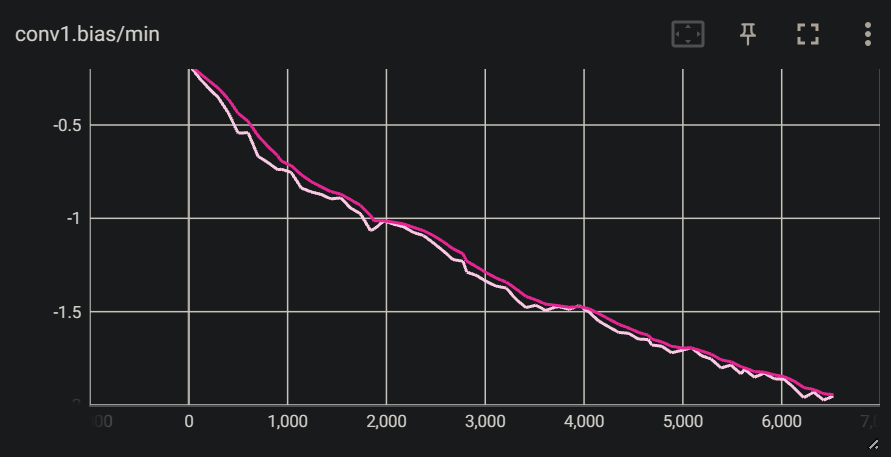

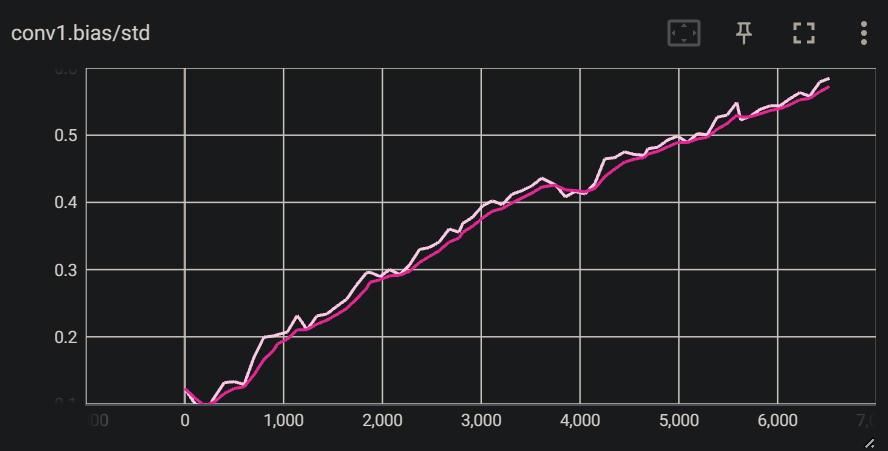

In [77]:
given_image = r'\conv1bias_max.png'
display(Image(filename=run2_res_path+given_image))

given_image = r'\conv1bias_min.png'
display(Image(filename=run2_res_path+given_image))

given_image = r'\conv1bias_std.png'
display(Image(filename=run2_res_path+given_image))

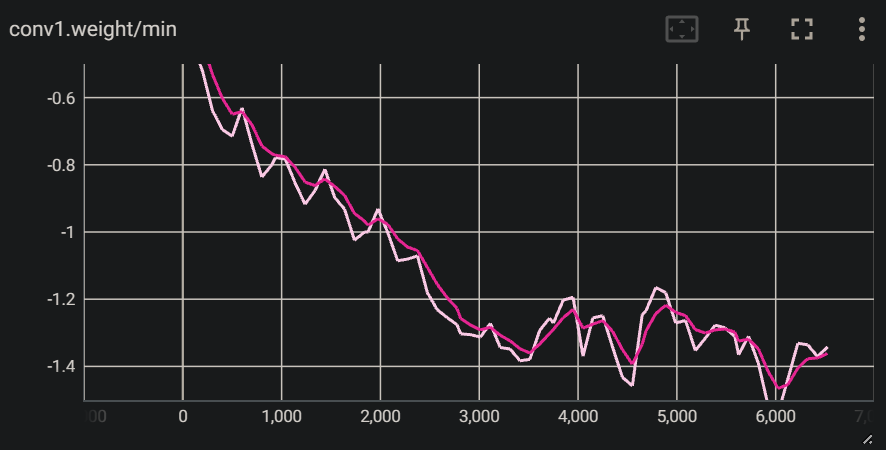

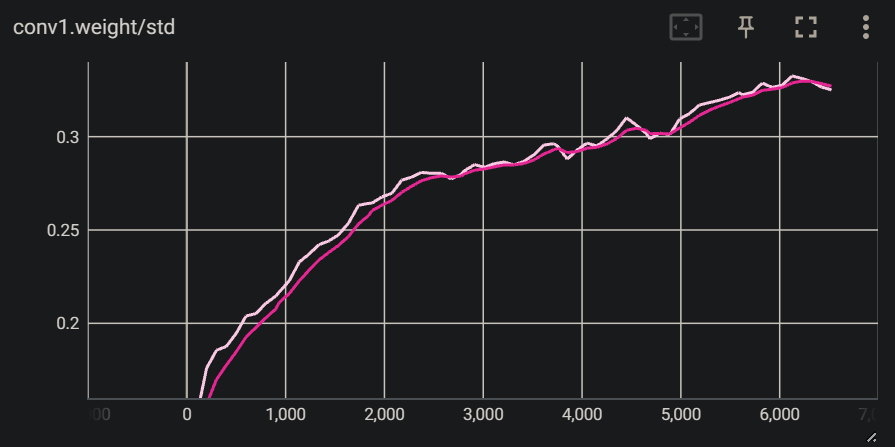

In [79]:
given_image = r'\conv1weight_min.png'
display(Image(filename=run2_res_path+given_image))

given_image = r'\conv1weight_std.png'
display(Image(filename=run2_res_path+given_image))

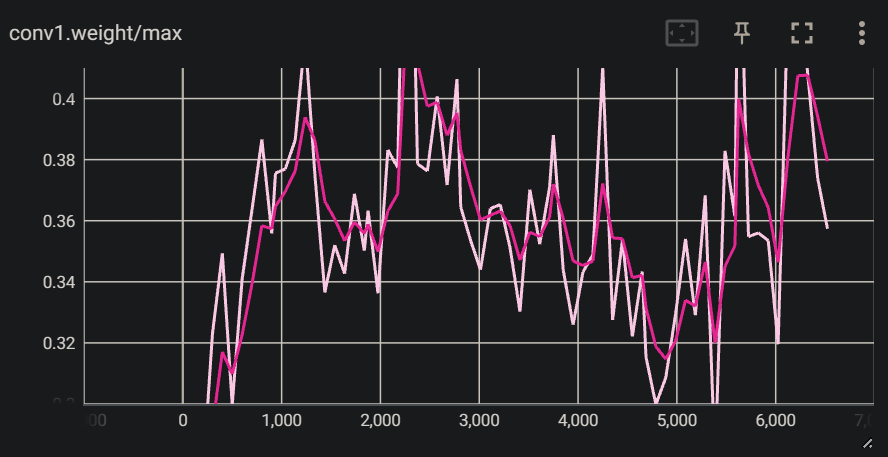

In [82]:
given_image = r'\conv2weight_max.png'
display(Image(filename=run2_res_path+given_image))

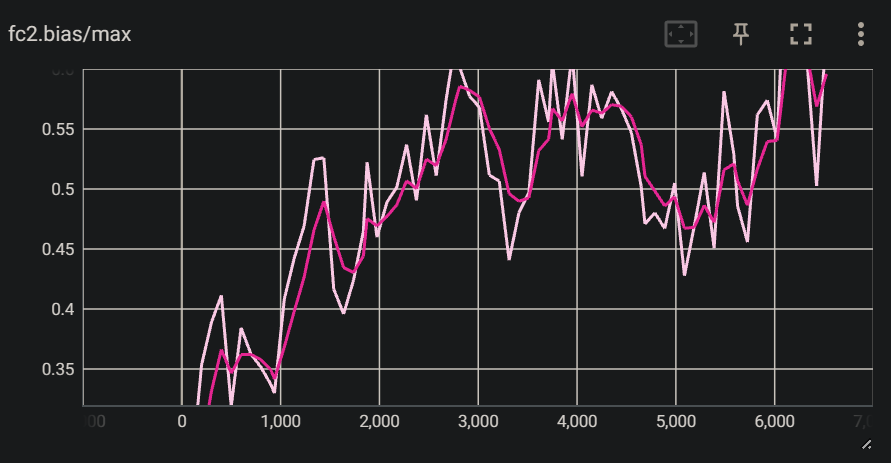

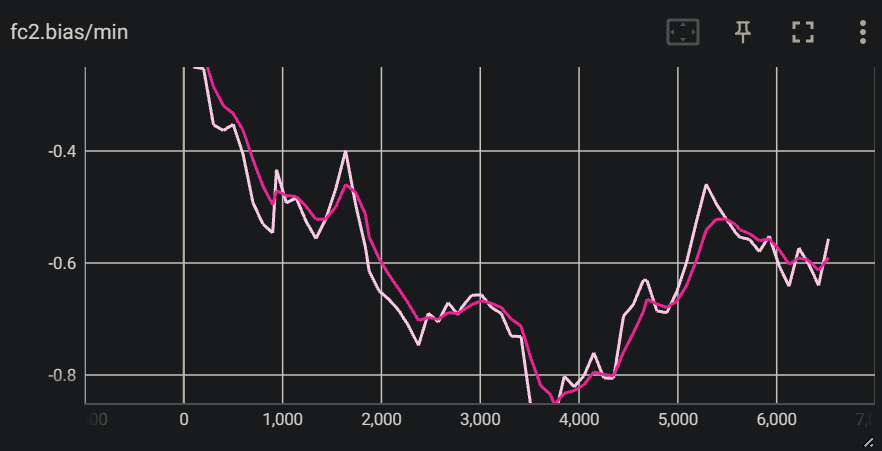

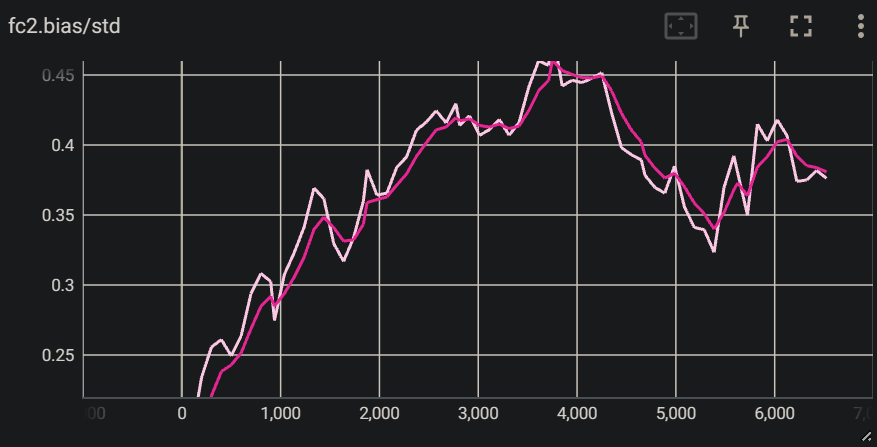

In [81]:
given_image = r'\fc2bias_max.png'
display(Image(filename=run2_res_path+given_image))

given_image = r'\fc2bias_min.png'
display(Image(filename=run2_res_path+given_image))

given_image = r'\fc2bias_std.png'
display(Image(filename=run2_res_path+given_image))

For some reason, the training and testing curves in tensorboard refused to load, or if they did they would crash the page. I am assuming this is because I logged the train/test loss every single iter as opposed to ever 100 like I did for the other statistics shown. I have opted to just screenshot the terminal to show the final training and testing scores.

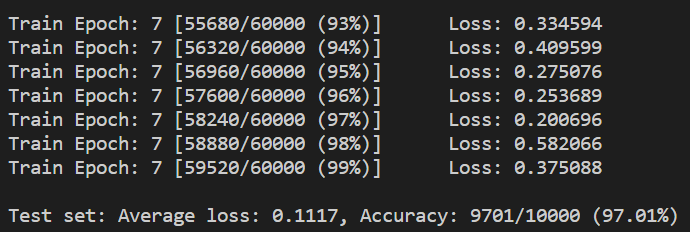

In [80]:
given_image = r'\test_results.png'
display(Image(filename=run2_res_path+given_image))

## 2c
- As you have noticed, I use ReLU non-linearity, and Adam training algorithm in our sample code. In this section, run the network training with different non-linearities (tanh, sigmoid, leaky-ReLU, MaxOut,...), initialization techniques (Xavier...) and training algorithms (SGD, Momentum-based Methods, Adagrad..). Make sure you still monitor the terms specified in part (b). Include the figures generated by TensorBoard and describe what you observe.

> In the following, I use Xavier weight initilizations:

In [88]:
run3_res_path = r'C:\Users\kdmen\Desktop\Fall23\ELEC576\HW1\tensorboard_pngs\Run3_Xavier'

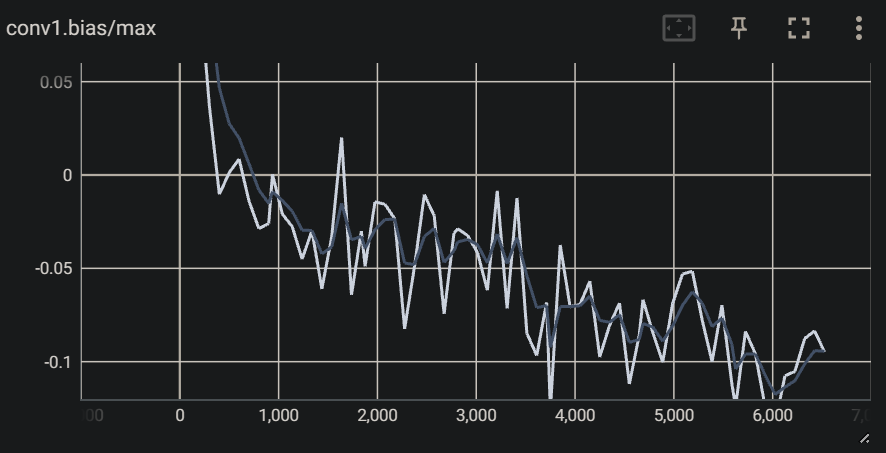

In [89]:
given_image = r'\conv1bias_max.png'
display(Image(filename=run3_res_path+given_image))

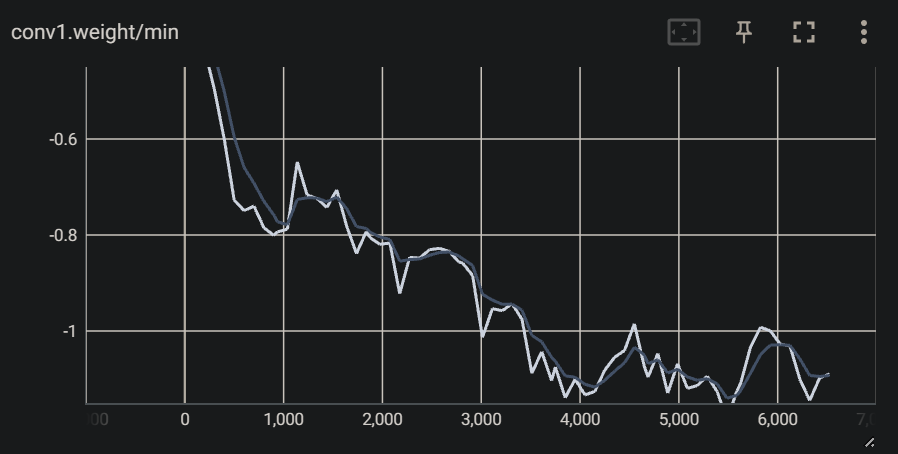

In [90]:
given_image = r'\conv1weight_min.png'
display(Image(filename=run3_res_path+given_image))

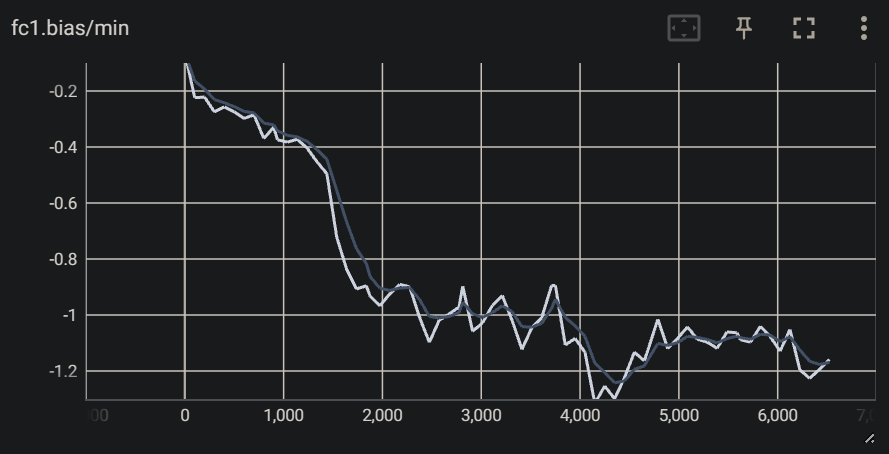

In [91]:
given_image = r'\fc1bias_min.png'
display(Image(filename=run3_res_path+given_image))

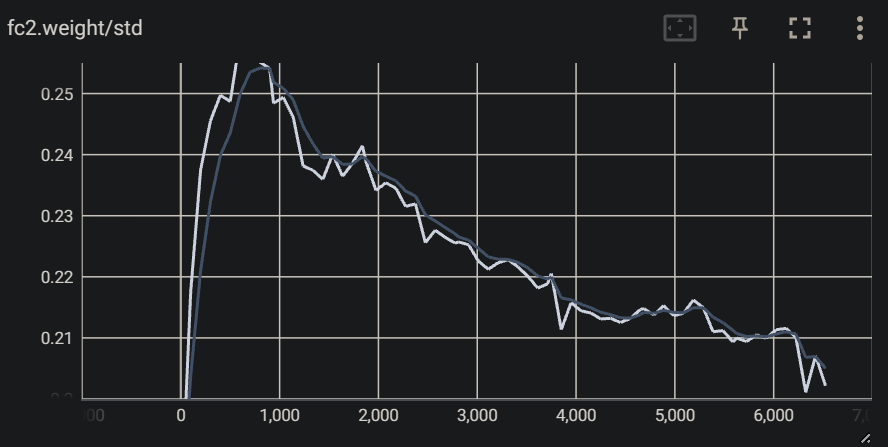

In [92]:
given_image = r'\fc2weight_std.png'
display(Image(filename=run3_res_path+given_image))

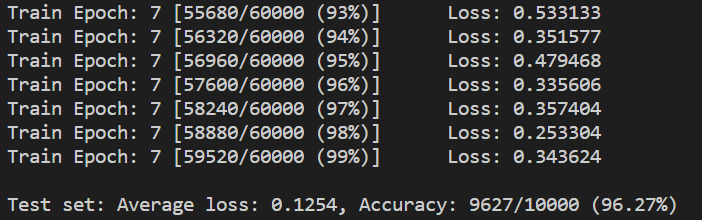

In [93]:
given_image = r'\final_testing_acc.png'
display(Image(filename=run3_res_path+given_image))

> __Conclusion:__ While the network still does quite well, the Xavier weights make a small dip in performance (96% vs 97%), although this could perhaps be due to the random seed used in either/both of the networks.

Run 4: Switched to using RMSProp as the optimizer, added weight decay (0.001) and also momentum (0.9)

In [83]:
run4_res_path = r'C:\Users\kdmen\Desktop\Fall23\ELEC576\HW1\tensorboard_pngs\Run4_RMSProp_WD_Momentump9'

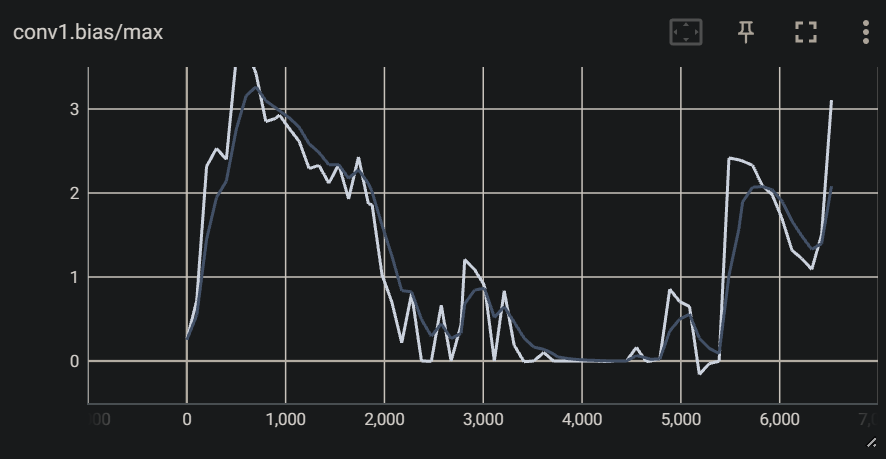

In [84]:
given_image = r'\conv1bias_max.png'
display(Image(filename=run4_res_path+given_image))

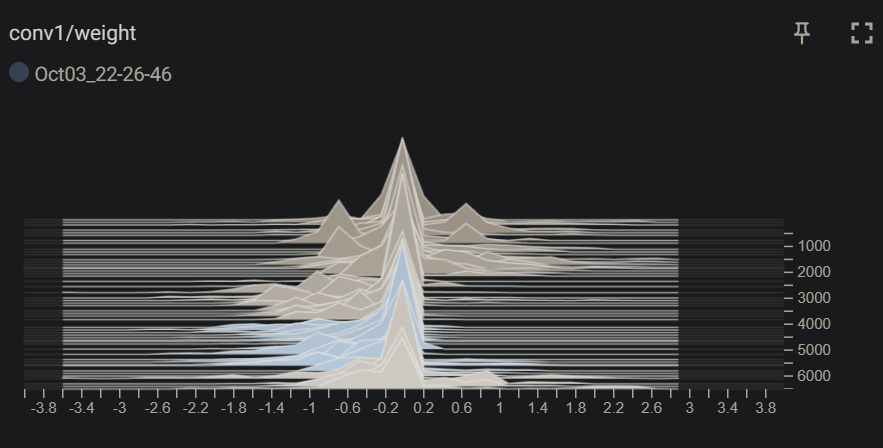

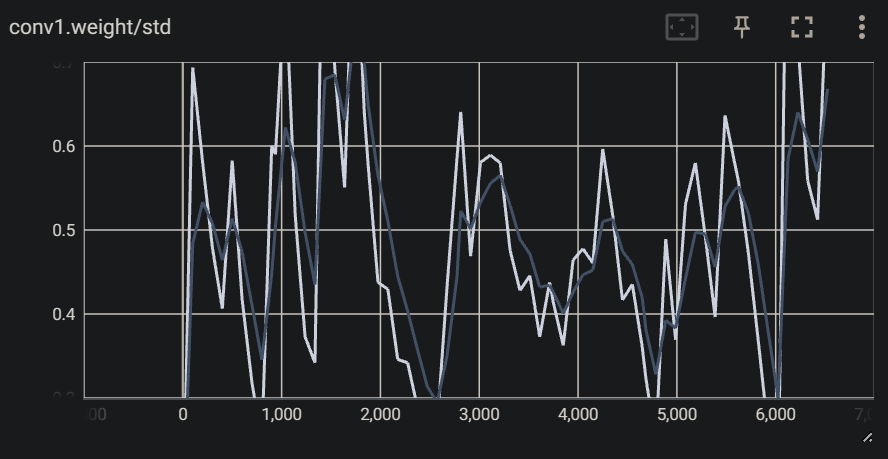

In [85]:
given_image = r'\conv1weight.png'
display(Image(filename=run4_res_path+given_image))

given_image = r'\conv1weight_std.png'
display(Image(filename=run4_res_path+given_image))

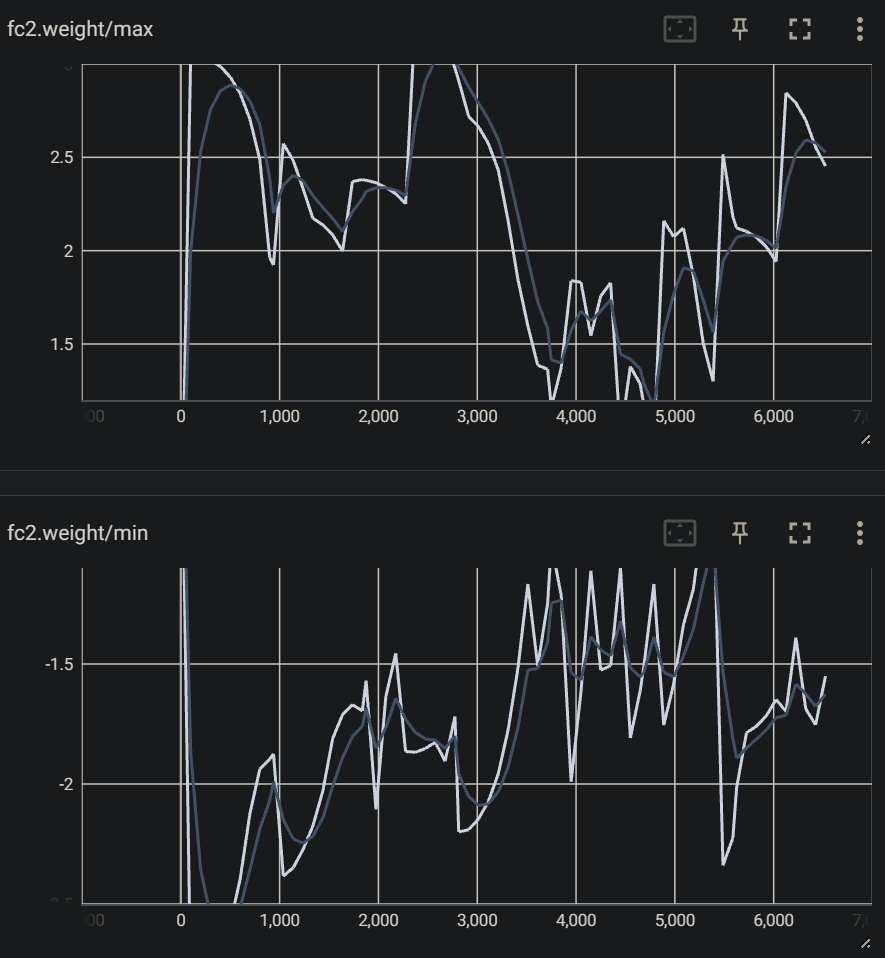

In [86]:
given_image = r'\fc2weight_maxmin.png'
display(Image(filename=run4_res_path+given_image))

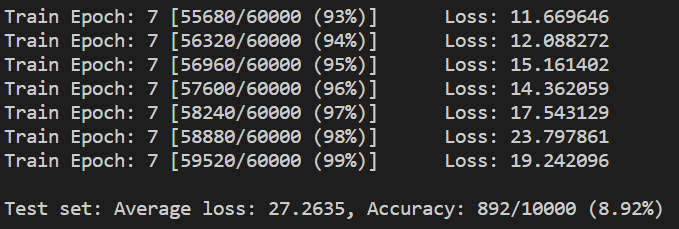

In [87]:
given_image = r'\failed_test_results.png'
display(Image(filename=run4_res_path+given_image))

> Clearly, RMSProp failed (only 8% testing accuracy). I attribute this to trying too many new things at once.

Run 5: Just vanilla RMSProp (no weight decay or momentum, just want to see if RMSProp works at all for this set up)

In [99]:
run5_res_path = r'C:\Users\kdmen\Desktop\Fall23\ELEC576\HW1\tensorboard_pngs\Run5_RMSProp'

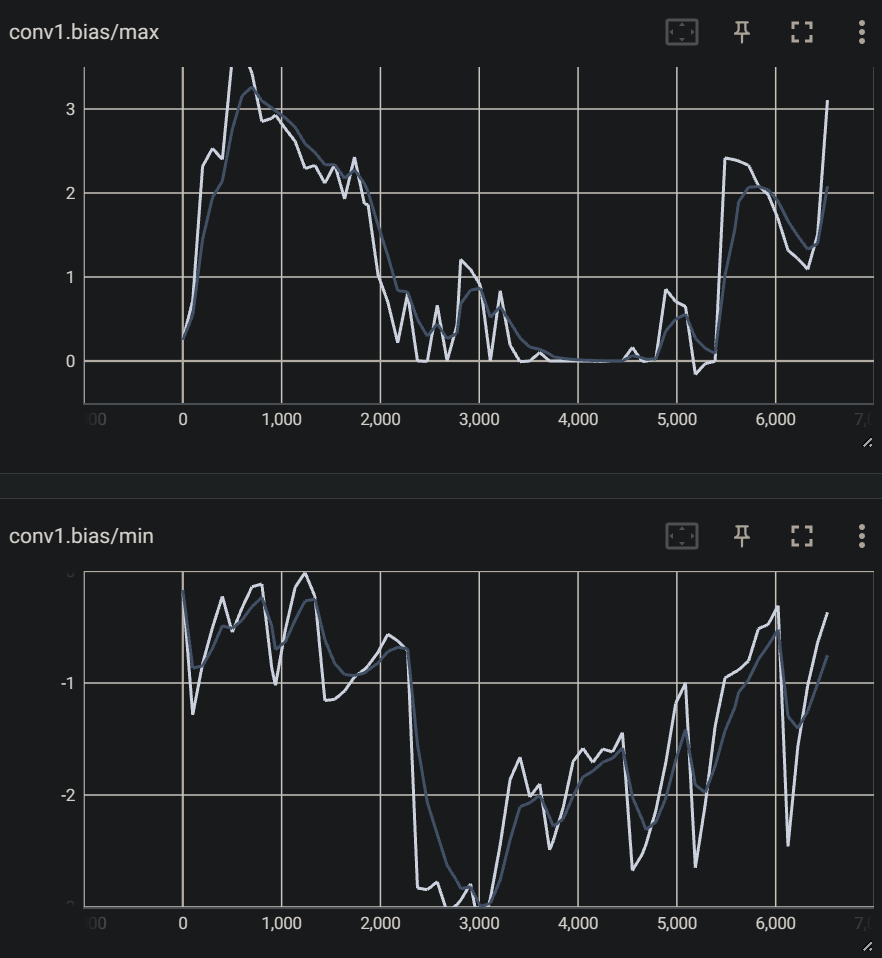

In [100]:
given_image = r'\conv1bias_maxmin.png'
display(Image(filename=run5_res_path+given_image))

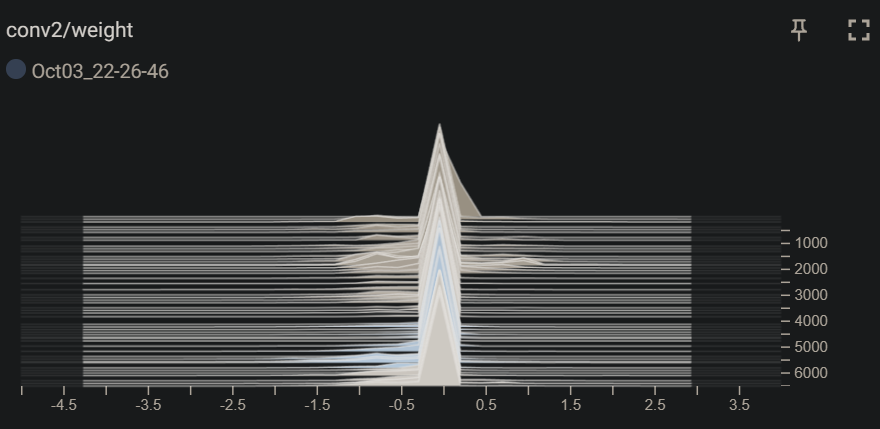

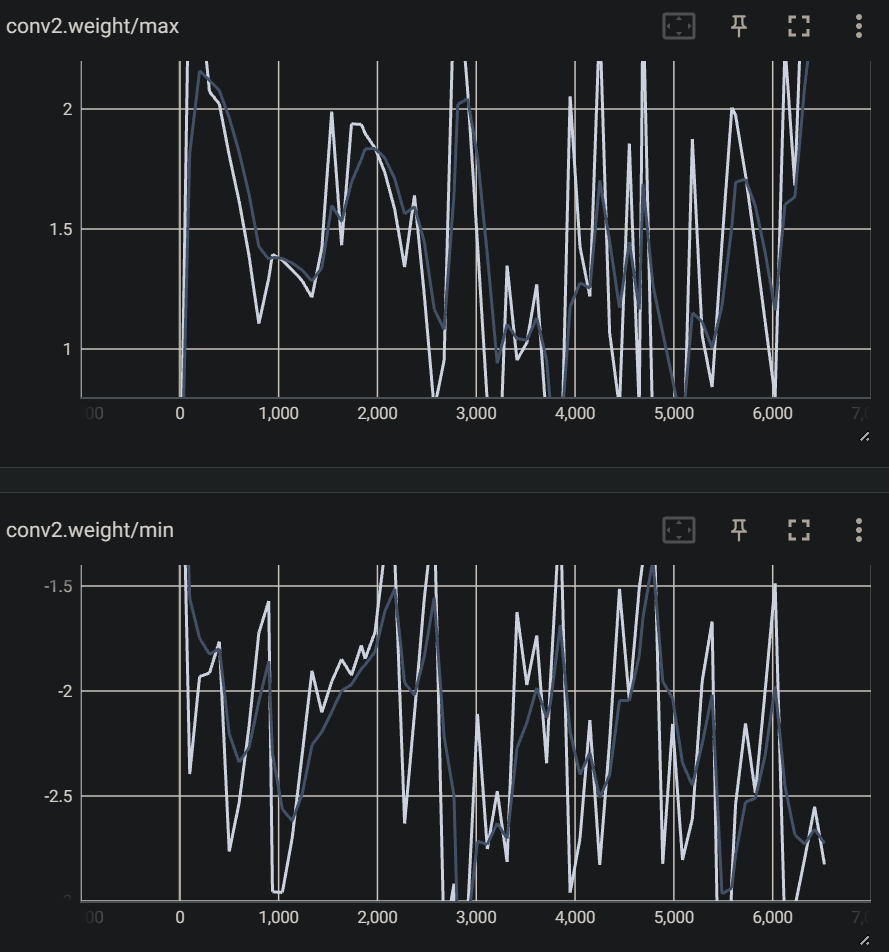

In [101]:
given_image = r'\conv2weight.png'
display(Image(filename=run5_res_path+given_image))

given_image = r'\conv2weight_minmax.png'
display(Image(filename=run5_res_path+given_image))

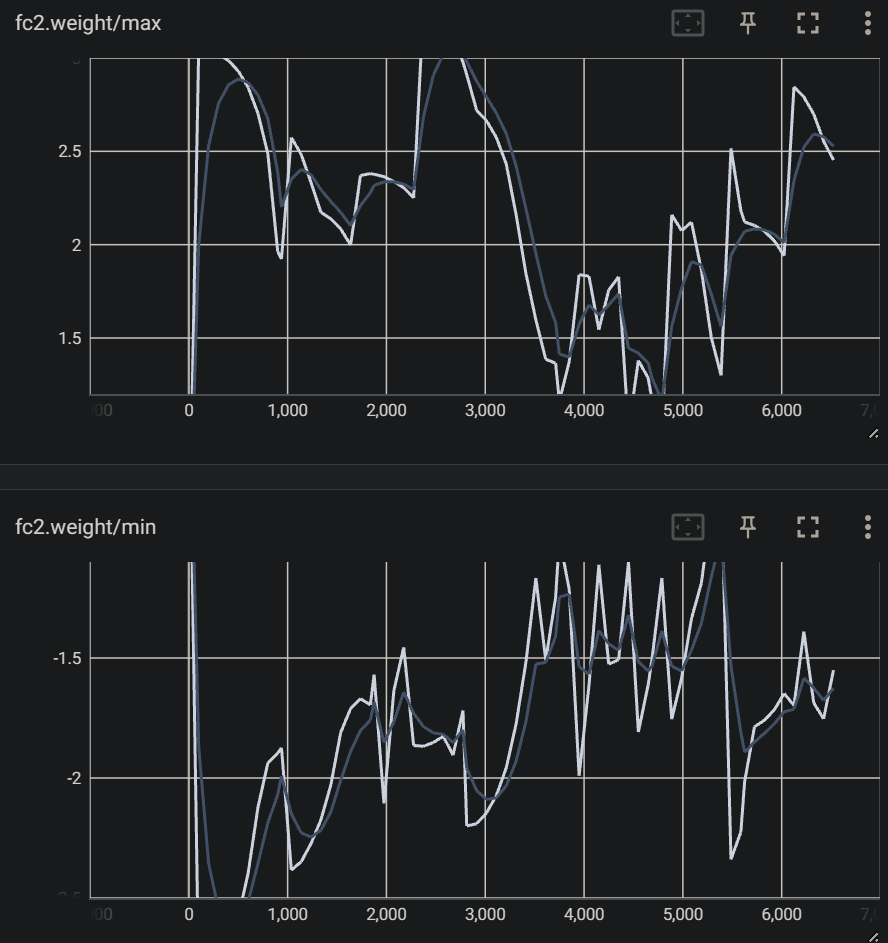

In [102]:
given_image = r'\fc2weight_maxmin.png'
display(Image(filename=run5_res_path+given_image))

Conv1 and Conv2 Histograms


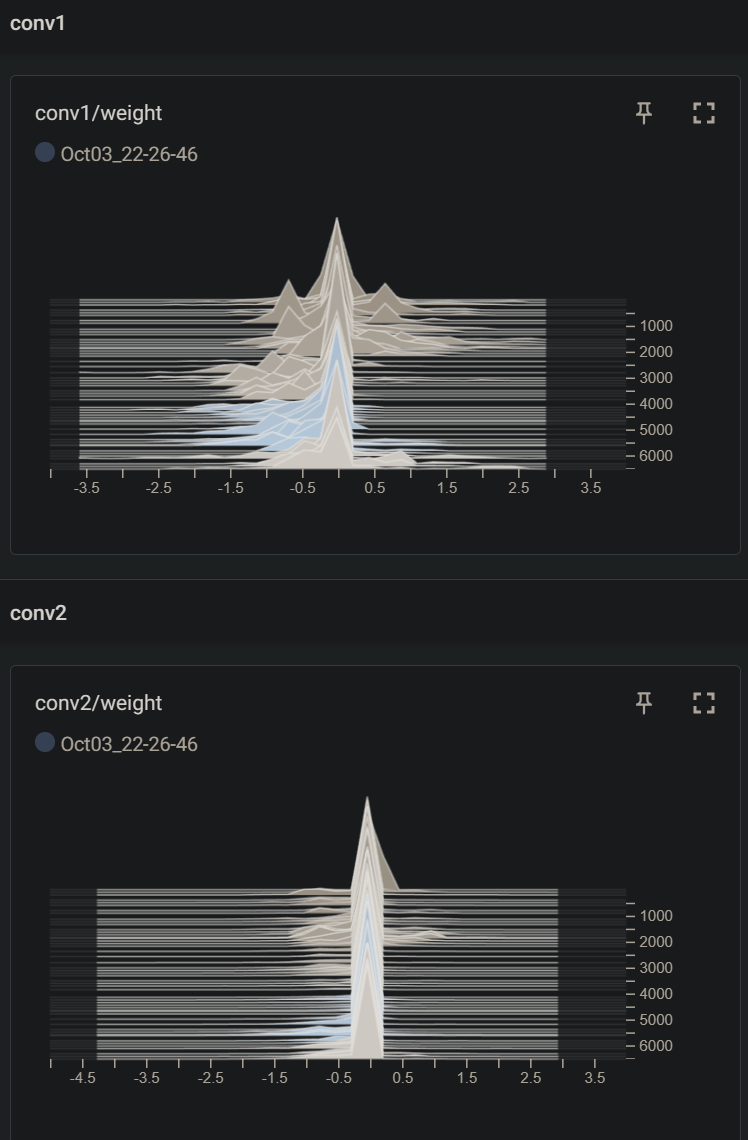

In [105]:
given_image = r'\conv1_and_2_histograms.png'
print("Conv1 and Conv2 Histograms")
display(Image(filename=run5_res_path+given_image))

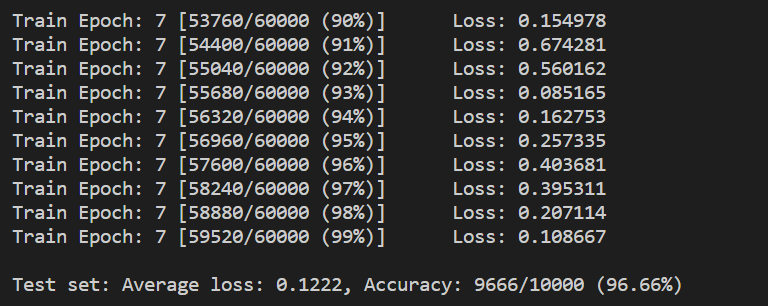

In [103]:
given_image = r'\testing_acc.png'
display(Image(filename=run5_res_path+given_image))

> __Conclusion:__ Here, we see that vanilla RMSProp is capable of solving this problem, and thus I was correct that I simply added too many moving parts which caused RMSProp to fail last time